# **1. Import Libraries and Read CSVs**

In [ ]:
# General
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [ ]:
# Charts
df_charts1 = pd.read_csv('https://raw.githubusercontent.com/jdmamangun/DataScienceFellowshipSprint3-Eskwelabs/main/ph_spotify_daily_charts_part1.csv')
df_charts2 = pd.read_csv('https://raw.githubusercontent.com/jdmamangun/DataScienceFellowshipSprint3-Eskwelabs/main/ph_spotify_daily_charts_part2.csv')
df_charts = pd.concat([df_charts1, df_charts2], ignore_index=True)

# Tracks
df_tracks1 = pd.read_csv('https://raw.githubusercontent.com/jdmamangun/DataScienceFellowshipSprint3-Eskwelabs/main/ph_spotify_daily_charts_tracks_part1.csv')
df_tracks2 = pd.read_csv('https://raw.githubusercontent.com/jdmamangun/DataScienceFellowshipSprint3-Eskwelabs/main/ph_spotify_daily_charts_tracks_part2.csv')
df_tracks3 = pd.read_csv('https://raw.githubusercontent.com/jdmamangun/DataScienceFellowshipSprint3-Eskwelabs/main/ph_spotify_daily_charts_tracks_part3.csv')
df_tracks = pd.concat([df_tracks1, df_tracks2, df_tracks3], ignore_index=True)

# Artists
df_artists = pd.read_csv('https://raw.githubusercontent.com/jdmamangun/DataScienceFellowshipSprint3-Eskwelabs/main/ph_spotify_daily_charts_artists.csv')

# **2. Data Preparation**

## ***2.1 Initial EDA***

> * Get Info
> * Descriptive Statistics
> * Correlation Matrix





In [ ]:
# Copy Initial DataFrames
dfc = df_charts.copy(deep=True)
dft = df_tracks.copy(deep=True)
dfa = df_artists.copy(deep=True)

### **2.1.1 Get Info on each DataFrame**

> **Insights**
- there are 10 rows with Null in dfc
- there are 5 rows with Null in dft






In [ ]:
# Charts
print("dfc.info():\n")
dfc.info()
dfc_null_rows = dfc[dfc.isnull().any(axis=1)]
print(f'\nNumber of Rows with Null in dfc: {dfc_null_rows.shape[0]}')
display(dfc_null_rows)
print("\n" + "-"*40 + "\n")

# Tracks
print("dft.info():\n")
dft.info()
dft_null_rows = dft[dft.isnull().any(axis=1)]
print(f'\nNumber of Rows with Null in dft: {dft_null_rows.shape[0]}')
display(dft_null_rows)
print("\n" + "-"*40 + "\n")

# Artists
print("dfa.info():\n")
dfa.info()
dfa_null_rows = dfa[dfa.isnull().any(axis=1)]
print(f'\n\nNumber of Rows with Null in dfa: {dfa_null_rows.shape[0]}')
display(dfa_null_rows)

dfc.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495798 entries, 0 to 495797
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        495798 non-null  object
 1   position    495798 non-null  int64 
 2   track_id    495798 non-null  object
 3   track_name  495788 non-null  object
 4   artist      495788 non-null  object
 5   streams     495798 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 22.7+ MB

Number of Rows with Null in dfc: 10


,date,position,track_id,track_name,artist,streams
39406,7/20/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,121541
39423,7/20/2017,24,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,85374
39426,7/20/2017,27,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,81223
39455,7/20/2017,56,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,46754
39606,7/21/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,120186
39621,7/21/2017,22,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,92580
39628,7/21/2017,29,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,83205
39690,7/21/2017,91,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,35049
39902,7/22/2017,103,6Br5mChPdgQNmLF0G0gjPH,NaN,NaN,29422
40098,7/23/2017,99,6Br5mChPdgQNmLF0G0gjPH,NaN,NaN,28054



----------------------------------------

dft.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          5042 non-null   object 
 1   track_name        5037 non-null   object 
 2   artist_id         5042 non-null   object 
 3   artist_name       5037 non-null   object 
 4   album_id          5042 non-null   object 
 5   duration          5042 non-null   int64  
 6   release_date      5042 non-null   object 
 7   popularity        5042 non-null   int64  
 8   danceability      5042 non-null   float64
 9   energy            5042 non-null   float64
 10  key               5042 non-null   int64  
 11  loudness          5042 non-null   float64
 12  mode              5042 non-null   int64  
 13  speechiness       5042 non-null   float64
 14  acousticness      5042 non-null   float64
 15  instrumentalness  5042 non-null  

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
646,3RXkboS74UYzN14xTqzPyY,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,4yQC726OERjevM2YKtORnm,0,0000,0,0.543,0.661,8,-5.855,0,0.0538,0.2140,0.000000,0.2410,0.5560,144.967
647,3eFJqPe8VUYrABbFjSauuj,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.948,0.405,1,-6.516,1,0.0795,0.1910,0.000000,0.0804,0.7280,121.021
648,4JAyIDXOqNM6qHuZML01uX,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.699,0.614,2,-4.570,1,0.0521,0.0152,0.000005,0.0734,0.2750,122.990
649,3bVbQvGVIe4n24AzyXovXh,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,6zP4EpOz9M0vhrjp7FNwKN,0,0000,0,0.644,0.531,0,-6.591,1,0.0673,0.1050,0.000000,0.0838,0.5240,100.028
684,6Br5mChPdgQNmLF0G0gjPH,NaN,0LyfQWJT6nXafLPZqxe9Of,NaN,3jd8KzVKriW0uzSsIwxfZM,0,0000,0,0.727,0.426,0,-9.225,1,0.0574,0.0667,0.000021,0.2670,0.0768,117.956



----------------------------------------

dfa.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_id    1035 non-null   object
 1   artist_name  1035 non-null   object
 2   followers    1035 non-null   int64 
 3   genres       1035 non-null   object
 4   popularity   1035 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 40.6+ KB


Number of Rows with Null in dfa: 0


,artist_id,artist_name,followers,genres,popularity


### **2.1.2 Descriptive Statistics**

In [ ]:
# Charts
print("dfc.describe():\n")
display(dfc.describe())
print("\n" + "-"*40 + "\n")

# Tracks
print("dft.describe():\n")
display(dft.describe())
print("\n" + "-"*40 + "\n")

# Artists
print("dfa.describe():\n")
display(dfa.describe())
print("\n" + "-"*40 + "\n")

dfc.describe():



,position,streams
count,495798.000000,4.957980e+05
mean,100.499786,6.548559e+04
std,57.734382,5.774199e+04
min,1.000000,1.100400e+04
25%,50.250000,2.962600e+04
50%,100.000000,4.423900e+04
75%,150.000000,8.135075e+04
max,200.000000,1.644340e+06



----------------------------------------

dft.describe():



,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000
mean,213683.900833,46.399246,0.636138,0.606603,5.161841,-6.695011,0.677509,0.082212,0.276672,0.011457,0.168560,0.467932,119.279440
std,47641.083599,31.414126,0.140442,0.188051,3.585992,2.799197,0.467476,0.081001,0.276085,0.078602,0.126863,0.218373,27.930752
min,0.000000,0.000000,0.174000,0.025000,0.000000,-24.250000,0.000000,0.023200,0.000002,0.000000,0.021500,0.032000,50.538000
25%,185320.000000,2.000000,0.545000,0.473000,2.000000,-8.170250,0.000000,0.035800,0.045525,0.000000,0.092700,0.297000,98.025000
50%,208572.500000,59.000000,0.650000,0.624000,5.000000,-6.256500,1.000000,0.051600,0.172000,0.000000,0.118000,0.457000,117.957500
75%,236966.000000,72.000000,0.737000,0.753750,8.000000,-4.759500,1.000000,0.089700,0.453000,0.000022,0.203000,0.636000,137.098000
max,613026.000000,100.000000,0.980000,0.996000,11.000000,0.175000,1.000000,0.884000,0.994000,0.962000,0.955000,0.978000,215.090000



----------------------------------------

dfa.describe():



,followers,popularity
count,1.035000e+03,1035.000000
mean,4.764085e+06,61.116908
std,1.115036e+07,15.930788
min,6.900000e+01,0.000000
25%,1.736220e+05,52.000000
50%,9.190230e+05,63.000000
75%,4.072150e+06,73.000000
max,1.157469e+08,100.000000



----------------------------------------



### **2.1.3 Correlation Matrix**

> **Insights**
- For Charts,
  - position and streams have a strong negative correlation i.e lesser-streamed tracks are given a higher position (ranked lower) in the chart
- For Tracks,
  - energy has a strong positive correlation with loudness i.e. tracks that are fast and noisy tend to be louder
  - danceability, energy and loudness has a medium positive correlation with valence i.e. tracks that are louder, energetic and danceable sound more positive (e.g. happy, cheerful, euphoric)
  - energy and loudness has a strong negative correlation with acousticness i.e. tracks that are fast, noisy and loud tend to be more electrically enhanced
- For Artists,
  - followers and popularity have a strong positive correlation i.e. artists that have many followers are more popular

[Musical Features](https://rpubs.com/mary18/860196#:~:text=Valence%3A%20A%20measure%20from%200.0,sad%2C%20depressed%2C%20angry)

[Degree of Correlation](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.)



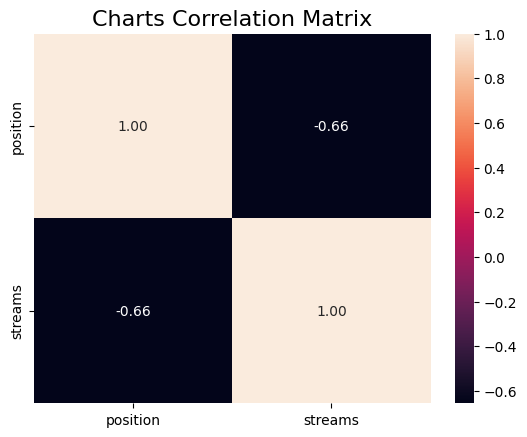

In [ ]:
# Charts
sns.heatmap(dfc.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title('Charts Correlation Matrix', fontsize=16)
plt.show()

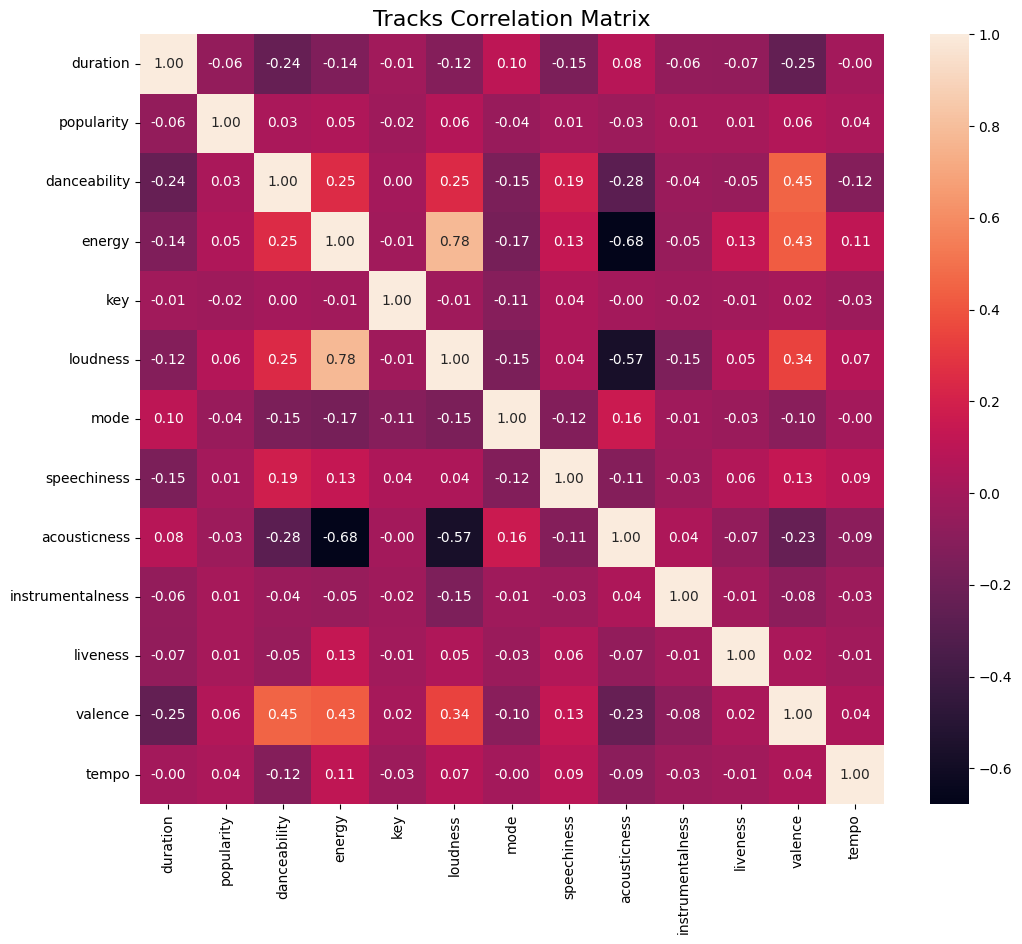

In [ ]:
# Tracks
plt.figure(figsize=(12, 10))
sns.heatmap(dft.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title('Tracks Correlation Matrix', fontsize=16)
plt.show()

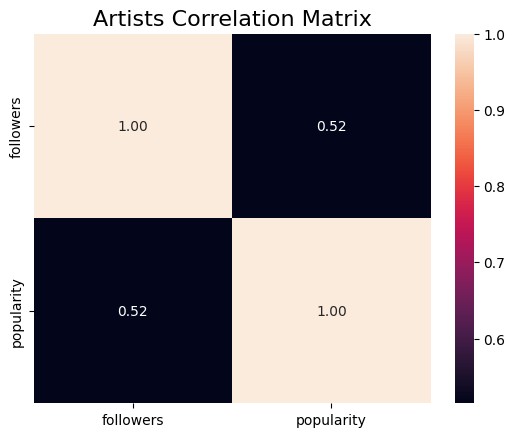

In [ ]:
# Artists
sns.heatmap(dfa.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title('Artists Correlation Matrix', fontsize=16)
plt.show()

## ***2.2 Data Cleaning and Feature Engineering***

> * Drop Rows with Nulls
> * Convert dtype of Dates
> * Merge DataFrames
> * Drop Redundant Columns as a Result of the Merge
> * Rename Columns
> * Create Additional Columns for Year, Month, Day of datetime Features
> * Rearrange Columns
> * Sort by Ascending Chart Date and Position


### **2.2.1 Drop Rows with Nulls**

> **Reason**
- dropping 10 rows in dfc and 5 rows in dft wouldn't significantly affect the dataset






In [ ]:
dfc.dropna(inplace=True)
dft.dropna(inplace=True)

### **2.2.2 Convert dtype of Dates to datetime**

> **Reason**
- opens opportunities for datetime analysis



In [ ]:
dfc['date'] = pd.to_datetime(dfc['date'])
dft['release_date'] = pd.to_datetime(dft['release_date'], errors='coerce')

### **2.2.3 Merge DataFrames via Inner Join**

> **Reason**
- inner join finds and returns matching data from tables



In [ ]:
df_merged = pd.merge(dfc, dft, on='track_id', how='inner')
df_merged = pd.merge(df_merged, dfa, on='artist_id', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495765 entries, 0 to 495764
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              495765 non-null  datetime64[ns]
 1   position          495765 non-null  int64         
 2   track_id          495765 non-null  object        
 3   track_name_x      495765 non-null  object        
 4   artist            495765 non-null  object        
 5   streams           495765 non-null  int64         
 6   track_name_y      495765 non-null  object        
 7   artist_id         495765 non-null  object        
 8   artist_name_x     495765 non-null  object        
 9   album_id          495765 non-null  object        
 10  duration          495765 non-null  int64         
 11  release_date      495765 non-null  datetime64[ns]
 12  popularity_x      495765 non-null  int64         
 13  danceability      495765 non-null  float64       
 14  ener

### **2.2.4 Drop Redundant Columns**

> **Reason**
- column names with suffixes _x and _y indicate that they are duplicates after the merge operation, we want to keep only one of each kind

In [ ]:
# Specify the columns to drop
columns_to_drop = ['track_name_y', 'artist_name_y', 'popularity_y', 'artist']

# Drop the specified columns
df_merged.drop(columns=columns_to_drop, inplace=True)

### **2.2.5 Rename Columns**

> **Reason**
- for clarity

In [ ]:
# Define a dictionary for column renaming
column_rename_mapping = {
    'track_name_x': 'track_name',
    'artist_name_x': 'artist_name',
    'popularity_x': 'popularity',
    'date': 'chart_date'
}

# Use the rename method to rename the columns
df_merged.rename(columns=column_rename_mapping, inplace=True)

### **2.2.6 Create Columns for Year, Month, Day of datetime Features**

> **Reason**
- opens opportunities for datetime analysis

In [ ]:
# Create new columns for 'chart_date' components
df_merged['chart_date_year'] = df_merged['chart_date'].dt.year
df_merged['chart_date_month'] = df_merged['chart_date'].dt.month
df_merged['chart_date_day'] = df_merged['chart_date'].dt.day

# Create new columns for 'release_date' components
df_merged['release_date_year'] = df_merged['release_date'].dt.year
df_merged['release_date_month'] = df_merged['release_date'].dt.month
df_merged['release_date_day'] = df_merged['release_date'].dt.day

### **2.2.7 Rearrange Columns**

> **Reason**
- for clarity

In [ ]:
# Define the desired column order
desired_column_order = [
    'chart_date',
    'track_id', 'track_name', 'streams', 'position', 'release_date', 'album_id',
    'artist_id', 'artist_name', 'genres', 'followers',
    'chart_date_year', 'chart_date_month', 'chart_date_day',
    'release_date_year', 'release_date_month', 'release_date_day',
    'acousticness', 'danceability', 'duration', 'energy', 'instrumentalness',
    'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence'
]

# Reorder the columns in the dataframe
df_merged = df_merged[desired_column_order]

### **2.2.8 Sort by Ascending Chart Date and Position**

> **Reason**
- for clarity



In [ ]:
# Sort the DataFrame by 'chart_date' and 'position' in ascending order and reset the index
df_merged = df_merged.sort_values(by=['chart_date', 'position'], ascending=[True, True]).reset_index(drop=True)

## ***2.3 Final EDA***

> * Choosing the Artist for the Study
> * Market Insights
> * Time-Series Forecasting (datetime methods, analysis techniques, forecasting methods)






In [ ]:
# Copy Final DataFrame
dfm = df_merged.copy(deep=True)

### **2.3.1 Chosen Artist: mrld**

#### **2.3.1.1 Artist-Selection Filters**

##### **Filter 1: select only artists that has a streak since the day they entered the PH Daily Top 200 Chart**

In [ ]:
# Limit options by selecting only artists that has a streak since the day they entered the PH Daily Top 200 Chart
# Find the first and last chart_date
first_chart_date = dfm['chart_date'].min()
last_chart_date = dfm['chart_date'].max()

# Find the first appearance date for each artist
first_appearance_date = dfm.groupby('artist_name')['chart_date'].min()

# Create a sequence of consecutive dates for each artist
consecutive_dates_per_artist = {
    artist: pd.date_range(start=first_date, end=last_chart_date)
    for artist, first_date in first_appearance_date.items()
}

# Check if each artist has an entry for each consecutive date
artists_with_streak = [
    artist for artist, consecutive_dates in consecutive_dates_per_artist.items()
    if consecutive_dates.isin(dfm[dfm['artist_name'] == artist]['chart_date']).all()
]

# Display the list of artists with a streak based on the criteria
artists_with_streak

['Adie',
 'Arctic Monkeys',
 'Arthur Nery',
 'Baby Blood',
 'Calein',
 'Cean Jr.',
 'Dilaw',
 'Dionela',
 'DĖMI',
 'E.J',
 'FIFTY FIFTY',
 'Hale',
 'Hev Abi',
 'JID',
 'Jeff Grecia',
 'Lola Amour',
 'Maki',
 'Mitski',
 'NOBITA',
 'NewJeans',
 'O SIDE MAFIA',
 'Sassa Gurl',
 'Shoti',
 'Sica',
 'Stacey Ryan',
 'Stephen Sanchez',
 'SunKissed Lola',
 'Teys',
 'The Walters',
 'Tu$ Brother$',
 'Tyla',
 'Yno',
 'Zack Tabudlo',
 'dhruv',
 'gins&melodies',
 'mrld',
 'rhodessa',
 'wave to earth',
 'yuji']

##### **Filter 2: select only Pinoy artists**

In [ ]:
# Segregate Pinoy and Foreign Artists
# Pinoy Artists
pinoy_artists = [
    'Adie', 'Arthur Nery',
    'Baby Blood',
    'Calein', 'Cean Jr.',
    'Dilaw', 'Dionela', 'DĖMI',
    'E.J', 'gins&melodies',
    'Hale', 'Hev Abi',
    'Jeff Grecia', 'Lola Amour',
    'Maki', 'mrld',
    'NOBITA', 'O SIDE MAFIA', 'rhodessa',
    'Sassa Gurl', 'Shoti', 'Sica', 'SunKissed Lola',
    'Teys', 'Tu$ Brother$',
    'Yno','Zack Tabudlo'
 ]

# Foreign Artists
foreign_artists = [
 'Arctic Monkeys', 'dhruv', 'FIFTY FIFTY', 'JID', 'Mitski', 'NewJeans',
 'Stacey Ryan', 'Stephen Sanchez',
 'The Walters', 'Tyla',
 'wave to earth',
 'yuji'
 ]

In [ ]:
# Print the date range of the dataset
print(f"Range of chart_date: {first_chart_date} to {last_chart_date}")

# Count the number of unique chart dates
unique_chart_dates = dfm['chart_date'].nunique()
print(f"Number of unique chart dates: {unique_chart_dates}")

Range of chart_date: 2017-01-01 00:00:00 to 2023-10-15 00:00:00
Number of unique chart dates: 2479


In [ ]:
# Filter the DataFrame to include only Pinoy artists
pinoy_artists_dates = dfm[dfm['artist_name'].isin(pinoy_artists)]

# Group by artist_name and calculate the min chart date, genre, number of appearances, and unique track names
artist_data = pinoy_artists_dates.groupby('artist_name').agg({
    'chart_date': 'min',
    'genres': 'first',
    'artist_id': 'count',
    'track_name': lambda x: ', '.join(x.unique()),
})

# Count the number of unique track names
# NOTE: we based it on the number of unique track_name since there are observed data inconsistencies in the metadata where different track_id values are assigned for the same song
#     : while it's possible that a single song is released in multiple versions (which results to a different track_id but share the same track_name)
#       for the purpose of counting the unique track of each artist, we'll use the track_name
artist_data['Number of Unique Tracks'] = pinoy_artists_dates.groupby('artist_name')['track_name'].nunique()

# Sort the minimum chart dates in ascending order
sorted_min_dates = artist_data.sort_values(by='chart_date')

# Rename the columns
sorted_min_dates = sorted_min_dates.reset_index()
sorted_min_dates.columns = ['Artist', 'Start of Streak', 'Genre', 'Number of Appearances', 'Tracks', 'Number of Unique Tracks']

# Calculate the max chart date for each artist
artist_max_dates = pinoy_artists_dates.groupby('artist_name')['chart_date'].max()
sorted_max_dates = artist_max_dates.reset_index()
sorted_max_dates.columns = ['Artist', 'End of Streak']

# Combine the DataFrames into one
streak_dates = sorted_min_dates.merge(sorted_max_dates, on='Artist', how='inner')

# Calculate the number of days in the streak for each artist
# NOTE: +1 counts the Start of the Streak
streak_dates['Streak Length'] = (streak_dates['End of Streak'] - streak_dates['Start of Streak']).dt.days + 1

# Re-arrange the columns
streak_dates = streak_dates[['Artist', 'Genre', 'Start of Streak', 'End of Streak', 'Streak Length', 'Number of Appearances', 'Tracks', 'Number of Unique Tracks']]

# Display the combined DataFrame
streak_dates

,Artist,Genre,Start of Streak,End of Streak,Streak Length,Number of Appearances,Tracks,Number of Unique Tracks
0,Hale,"['opm', 'pinoy reggae']",2017-01-01,2023-10-15,2479,5124,"The Day You Said Goodnight - Acoustic Version,...",4
1,Arthur Nery,"['cdo indie', 'opm', 'p-pop']",2020-06-05,2023-10-15,1228,4630,"Higa, Binhi, Happy w u (feat. Jason Dhakal), L...",13
2,Zack Tabudlo,"['acoustic opm', 'opm', 'p-pop']",2021-04-06,2023-10-15,923,4898,"Nangangamba, Binibini, Sigurado, Iyong Iyo, Bi...",17
3,Adie,['opm'],2021-05-11,2023-10-15,888,2320,"Paraluman, Dungaw, Tahanan, Mahika, Kabado, G....",6
4,NOBITA,['opm'],2021-06-01,2023-10-15,867,1478,"Ikaw Lang, Unang Sayaw",2
5,mrld,['opm'],2021-12-01,2023-10-15,684,1425,"Ligaya, An Art Gallery Could Never Be As Uniqu...",3
6,Lola Amour,['opm'],2022-06-30,2023-10-15,473,589,"Fallen, Raining In Manila",2
7,Calein,['pinoy city pop'],2022-09-24,2023-10-15,387,387,Umaasa,1
8,SunKissed Lola,"['opm', 'pinoy indie rock']",2022-12-17,2023-10-15,303,320,"Pasilyo, Paki Sabi",2
9,Cean Jr.,"['pinoy hip hop', 'pinoy r&b']",2023-02-02,2023-10-15,256,256,YK,1


##### **Filter 3: select only Pinoy Artists that has a streak length of at least 365 days & exclude one-hit wonders**

In [ ]:
# Select only artists that have at least a 365-day (1-year) Streak and more than 1 unique track (exclude 1-hit wonders)
filtered_streak_dates = streak_dates[(streak_dates['Streak Length'] >= 365) & (streak_dates['Number of Unique Tracks'] > 1)]
filtered_streak_dates

,Artist,Genre,Start of Streak,End of Streak,Streak Length,Number of Appearances,Tracks,Number of Unique Tracks
0,Hale,"['opm', 'pinoy reggae']",2017-01-01,2023-10-15,2479,5124,"The Day You Said Goodnight - Acoustic Version,...",4
1,Arthur Nery,"['cdo indie', 'opm', 'p-pop']",2020-06-05,2023-10-15,1228,4630,"Higa, Binhi, Happy w u (feat. Jason Dhakal), L...",13
2,Zack Tabudlo,"['acoustic opm', 'opm', 'p-pop']",2021-04-06,2023-10-15,923,4898,"Nangangamba, Binibini, Sigurado, Iyong Iyo, Bi...",17
3,Adie,['opm'],2021-05-11,2023-10-15,888,2320,"Paraluman, Dungaw, Tahanan, Mahika, Kabado, G....",6
4,NOBITA,['opm'],2021-06-01,2023-10-15,867,1478,"Ikaw Lang, Unang Sayaw",2
5,mrld,['opm'],2021-12-01,2023-10-15,684,1425,"Ligaya, An Art Gallery Could Never Be As Uniqu...",3
6,Lola Amour,['opm'],2022-06-30,2023-10-15,473,589,"Fallen, Raining In Manila",2


##### **Filter 4: possess tracks that are released within the year range of the dataset (2017-2023)**

In [ ]:
# Define a helper function to retrieve the tracks (and their release date) associated with the artist
def get_artist_tracks_with_release_date(artist_name, df):
    # Filter the DataFrame to include only the specified artist
    artist_tracks = df[df['artist_name'] == artist_name]

    # Group the artist's tracks by track_name and get the release_date
    artist_track_data = artist_tracks.groupby('track_name')['release_date'].first().reset_index()

    return artist_track_data

In [ ]:
print('Hale')
get_artist_tracks_with_release_date('Hale', dfm).sort_values(by='release_date', ascending=True).reset_index(drop=True)

Hale


,track_name,release_date
0,Blue Sky,2005-01-01
1,The Day You Said Goodnight,2005-01-01
2,The Day You Said Goodnight - Acoustic Version,2006-02-26
3,Kung Wala Ka,2012-01-01


In [ ]:
print('Arthur Nery')
get_artist_tracks_with_release_date('Arthur Nery', dfm).sort_values(by='release_date', ascending=True).reset_index(drop=True)

Arthur Nery


,track_name,release_date
0,Binhi,2019-10-25
1,Cotton Candy,2019-10-25
2,Favorite Vice,2019-10-25
3,Higa,2019-10-25
4,Hung Up,2019-10-25
5,I'd Still Kiss You,2019-10-25
6,Life Puzzle,2019-10-25
7,Happy w u,2020-12-22
8,Happy w u (feat. Jason Dhakal),2020-12-22
9,TAKE ALL THE LOVE,2021-04-23


In [ ]:
print('Zack Tabudlo')
get_artist_tracks_with_release_date('Zack Tabudlo', dfm).sort_values(by='release_date', ascending=True).reset_index(drop=True)

Zack Tabudlo


,track_name,release_date
0,Nangangamba,2020-08-07
1,Sigurado,2020-12-04
2,Iyong Iyo,2021-02-12
3,Binibini,2021-03-26
4,Binibini (Last Day On Earth) (feat. James TW),2021-06-11
5,Habang Buhay,2021-09-17
6,Heart Can’t Lose,2021-10-15
7,Give Me Your Forever,2021-10-15
8,Hindi Ko Kaya,2021-10-15
9,Pano,2021-12-06


In [ ]:
print('Adie')
get_artist_tracks_with_release_date('Adie', dfm).sort_values(by='release_date', ascending=True).reset_index(drop=True)

Adie


,track_name,release_date
0,Paraluman,2021-03-26
1,Dungaw,2021-07-16
2,Tahanan,2021-12-08
3,Mahika,2022-05-11
4,Kabado,2022-08-12
5,G.K.Y.A.M.,2023-01-27


In [ ]:
print('NOBITA')
get_artist_tracks_with_release_date('NOBITA', dfm).sort_values(by='release_date', ascending=True).reset_index(drop=True)

NOBITA


,track_name,release_date
0,Ikaw Lang,2020-06-12
1,Unang Sayaw,2021-08-18


In [ ]:
print('mrld')
get_artist_tracks_with_release_date('mrld', dfm).sort_values(by='release_date', ascending=True).reset_index(drop=True)

mrld


,track_name,release_date
0,An Art Gallery Could Never Be As Unique As You,2019-12-11
1,Ligaya,2021-10-06
2,Ikaw Pa Rin,2022-09-02


In [ ]:
print('Lola Amour')
get_artist_tracks_with_release_date('Lola Amour', dfm).sort_values(by='release_date', ascending=True).reset_index(drop=True)

Lola Amour


,track_name,release_date
0,Fallen,2021-06-25
1,Raining In Manila,2023-06-14


In [ ]:
# Exclude Hale since their tracks are classics and was released more than 10 years ago
filtered_streak_dates = filtered_streak_dates[filtered_streak_dates['Artist'] != 'Hale']
filtered_streak_dates.reset_index(drop=True)

,Artist,Genre,Start of Streak,End of Streak,Streak Length,Number of Appearances,Tracks,Number of Unique Tracks
0,Arthur Nery,"['cdo indie', 'opm', 'p-pop']",2020-06-05,2023-10-15,1228,4630,"Higa, Binhi, Happy w u (feat. Jason Dhakal), L...",13
1,Zack Tabudlo,"['acoustic opm', 'opm', 'p-pop']",2021-04-06,2023-10-15,923,4898,"Nangangamba, Binibini, Sigurado, Iyong Iyo, Bi...",17
2,Adie,['opm'],2021-05-11,2023-10-15,888,2320,"Paraluman, Dungaw, Tahanan, Mahika, Kabado, G....",6
3,NOBITA,['opm'],2021-06-01,2023-10-15,867,1478,"Ikaw Lang, Unang Sayaw",2
4,mrld,['opm'],2021-12-01,2023-10-15,684,1425,"Ligaya, An Art Gallery Could Never Be As Uniqu...",3
5,Lola Amour,['opm'],2022-06-30,2023-10-15,473,589,"Fallen, Raining In Manila",2


##### **Filter 5: select the Pinoy artist that has the lowest prevailing position (mode) in the chart**

In [ ]:
# Put the remaining Pinoy Artists in a list
remaining_pinoy_artists = filtered_streak_dates['Artist'].tolist()

# Filter the DataFrame to include only rows with artists in remaining_pinoy_artists
remaining_pinoy_artists = dfm[dfm['artist_name'].isin(remaining_pinoy_artists)]

# Calculate the mode (most frequent position) for each artist
remaining_pinoy_artists_position_mode = remaining_pinoy_artists.groupby('artist_name')['position'].agg(lambda x: x.mode().iat[0])

# Display the mode position for each artist
remaining_pinoy_artists_position_mode.sort_values(ascending=False)

artist_name
mrld            36
Lola Amour      16
Adie             6
NOBITA           6
Arthur Nery      4
Zack Tabudlo     1
Name: position, dtype: int64

In [ ]:
chosen_artist = ['mrld']

#### **2.3.1.2 Artist Profile**

In [ ]:
# Filter the DataFrame to include only tracks by the artist 'mrld'
mrld_tracks = dfm[dfm['artist_name'] == 'mrld']

# # Select unique track_id and track_name
# unique_mrld_tracks = mrld_tracks[['track_id', 'track_name']].drop_duplicates()

# Select unique track_name
unique_mrld_tracks = mrld_tracks[['track_name']].drop_duplicates()

# Display the unique track_id and track_name
print(unique_mrld_tracks)

                                            track_name
359107                                          Ligaya
374157  An Art Gallery Could Never Be As Unique As You
420166                                     Ikaw Pa Rin


In [ ]:
# Define the list of track names
track_names = ['Ligaya', 'An Art Gallery Could Never Be As Unique As You', 'Ikaw Pa Rin']

# Initialize a dictionary to store the mode positions for each track name
mode_positions = {}

# Iterate through each track name
for track_name in track_names:
    # Filter the DataFrame to include only tracks with the current track name by the artist 'mrld'
    mrld_tracks = dfm[(dfm['artist_name'] == 'mrld') & (dfm['track_name'] == track_name)]

    # Calculate the mode position for the current track name
    mode_position = mrld_tracks['position'].mode()

    # Check if there is a mode (multiple positions with the same frequency)
    if not mode_position.empty:
        # If there are multiple modes, get the first one
        mode_positions[track_name] = mode_position.iloc[0]
    else:
        mode_positions[track_name] = None  # No mode found

# Display the mode positions for each track name
for track_name, mode_position in mode_positions.items():
    if mode_position is not None:
        print(f"Mode position for '{track_name}' by 'mrld': {mode_position}")
    else:
        print(f"No mode position found for '{track_name}' by 'mrld'")

Mode position for 'Ligaya' by 'mrld': 25
Mode position for 'An Art Gallery Could Never Be As Unique As You' by 'mrld': 137
Mode position for 'Ikaw Pa Rin' by 'mrld': 39


In [ ]:
# Define the list of track names
track_names = ['Ligaya', 'An Art Gallery Could Never Be As Unique As You', 'Ikaw Pa Rin']

# Initialize a dictionary to store the total streams for each track name
total_streams = {}

# Iterate through each track name
for track_name in track_names:
    # Filter the DataFrame to include only tracks with the current track name by the artist 'mrld'
    mrld_tracks = dfm[(dfm['artist_name'] == 'mrld') & (dfm['track_name'] == track_name)]

    # Calculate the total streams for the current track name
    total_streams[track_name] = mrld_tracks['streams'].sum()

# Display the total streams for each track name
for track_name, streams in total_streams.items():
    print(f"Total streams for '{track_name}' by 'mrld': {streams}")

Total streams for 'Ligaya' by 'mrld': 76310386
Total streams for 'An Art Gallery Could Never Be As Unique As You' by 'mrld': 21738616
Total streams for 'Ikaw Pa Rin' by 'mrld': 42501450


In [ ]:
# Define the list of track names
track_names = ['Ligaya', 'An Art Gallery Could Never Be As Unique As You', 'Ikaw Pa Rin']

# Initialize a dictionary to store the release dates for each track name
release_dates = {}

# Iterate through each track name
for track_name in track_names:
    # Filter the DataFrame to include only tracks with the current track name by the artist 'mrld'
    mrld_tracks = dfm[(dfm['artist_name'] == 'mrld') & (dfm['track_name'] == track_name)]

    # Get the unique release dates for the current track name
    unique_release_dates = mrld_tracks['release_date'].dt.date.unique()

    # Store the release dates in the dictionary
    release_dates[track_name] = unique_release_dates

# Display the release dates for each track name
for track_name, dates in release_dates.items():
    print(f"Release dates for '{track_name}' by 'mrld': {', '.join(map(str, dates))}")

Release dates for 'Ligaya' by 'mrld': 2021-10-06
Release dates for 'An Art Gallery Could Never Be As Unique As You' by 'mrld': 2019-12-11
Release dates for 'Ikaw Pa Rin' by 'mrld': 2022-09-02


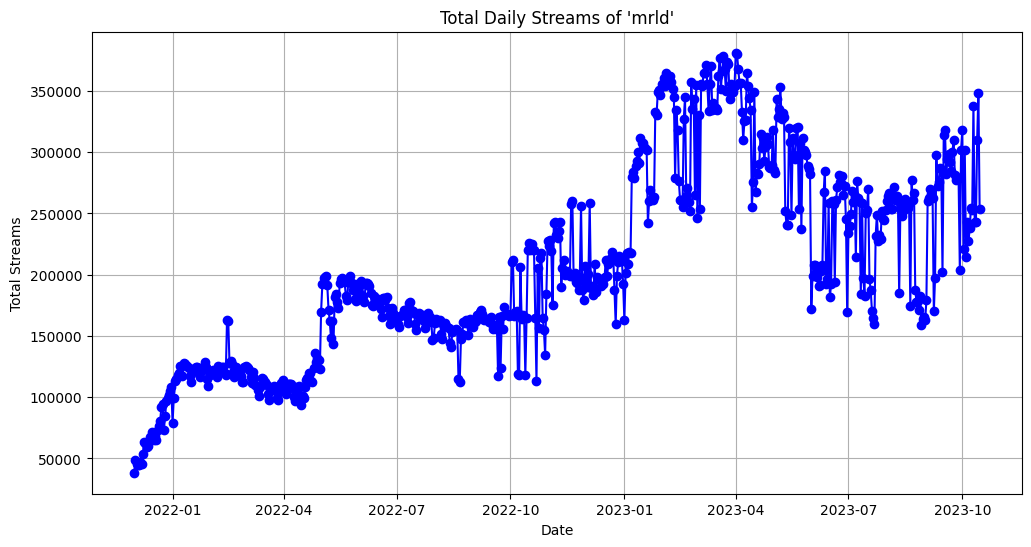

In [ ]:
# Filter the DataFrame to include only tracks by 'mrld'
mrld_tracks = dfm[dfm['artist_name'] == 'mrld']

# Set 'chart_date' as the index and resample the data by day, summing the streams for each day
daily_streams = mrld_tracks.set_index('chart_date').resample('D')['streams'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_streams.index, daily_streams.values, marker='o', linestyle='-', color='b')
plt.title("Total Daily Streams of 'mrld'")
plt.xlabel("Date")
plt.ylabel("Total Streams")
plt.grid(True)

# Show the line chart
plt.show()

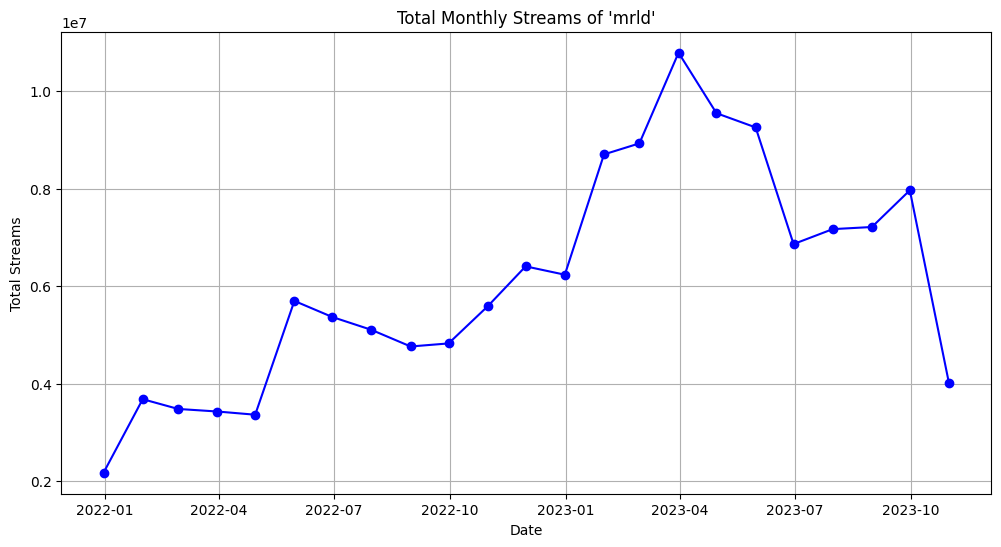

In [ ]:
# Filter the DataFrame to include only tracks by 'mrld'
mrld_tracks = dfm[dfm['artist_name'] == 'mrld']

# Set 'chart_date' as the index and resample the data by month, summing the streams for each month
daily_streams = mrld_tracks.set_index('chart_date').resample('M')['streams'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_streams.index, daily_streams.values, marker='o', linestyle='-', color='b')
plt.title("Total Monthly Streams of 'mrld'")
plt.xlabel("Date")
plt.ylabel("Total Streams")
plt.grid(True)

# Show the line chart
plt.show()

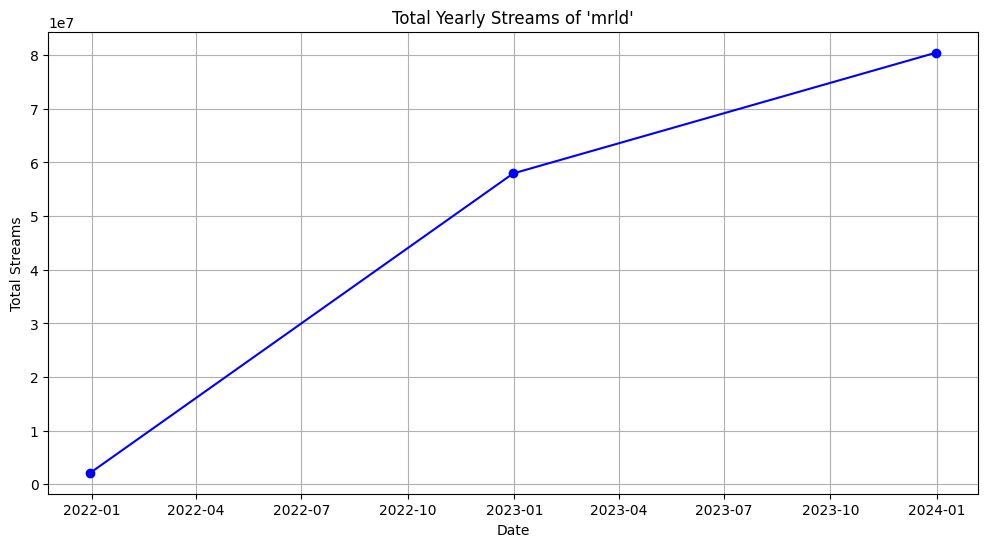

In [ ]:
# Filter the DataFrame to include only tracks by 'mrld'
mrld_tracks = dfm[dfm['artist_name'] == 'mrld']

# Set 'chart_date' as the index and resample the data by year, summing the streams for each year
daily_streams = mrld_tracks.set_index('chart_date').resample('Y')['streams'].sum()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_streams.index, daily_streams.values, marker='o', linestyle='-', color='b')
plt.title("Total Yearly Streams of 'mrld'")
plt.xlabel("Date")
plt.ylabel("Total Streams")
plt.grid(True)

# Show the line chart
plt.show()

### **2.3.2 PH Music Landscape**

In [ ]:
dfm_count=dfm.copy()

In [ ]:
dfm_count.to_csv("full_ph_spotify_daily_charts_tracks", index=False, encoding='utf-8')

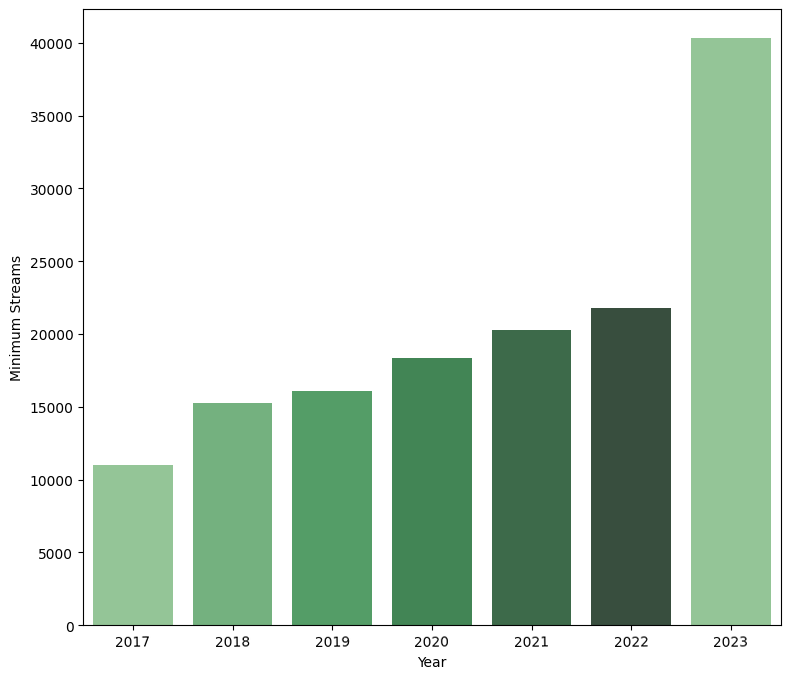

In [ ]:
# It's 4x harder to make a hit song
dfm_pivot = dfm_count.pivot_table(values='streams', index='chart_date_year', aggfunc={'streams': np.min})
dfm_pivot = dfm_pivot.reset_index()
color = sns.color_palette(palette='Greens_d')

# Visualize
plt.figure(figsize=(9, 8))
sns.barplot(x='chart_date_year', y='streams', data=dfm_pivot, palette=color)
# plt.title('Minimum Stream to Get In PH Daily Top 200s')
plt.xlabel('Year')
plt.ylabel('Minimum Streams')
plt.xticks(rotation=1)  # Rotate the x-axis labels for better readability
plt.grid(False)

plt.savefig('min_streams.png', transparent=True)

# Show the plot
plt.show()

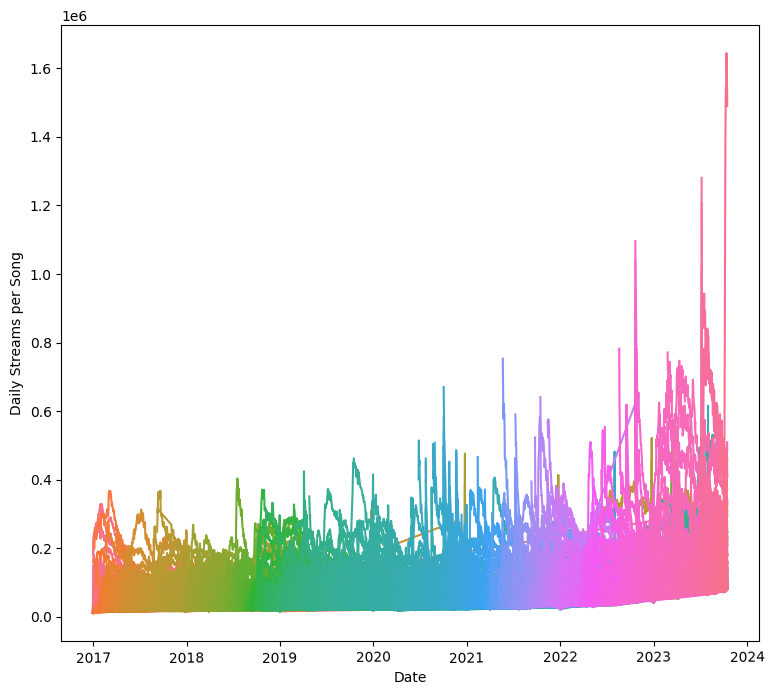

In [ ]:
# But we're also seeing 4x higher streams for a hit song (takes long to load)

plt.figure(figsize=(9, 8))
sns.lineplot(x="chart_date", y="streams", hue="track_name", data=dfm_count, legend=False)
# plt.title("All Tracks Streams Performance")
plt.xlabel("Date")
plt.ylabel("Daily Streams per Song")
plt.xticks(rotation=1)
# plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))  # Adjust the legend position
plt.grid(False)

plt.savefig('total_streams.png', transparent=True)

plt.show()


In [ ]:
# Outlier song with the highest daily stream
highest_stream = dfm_count.nlargest(1, 'streams')
highest_stream

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
494965,2023-10-12,2BLdelIp46CHvKkyWeqZHL,ERE,1644340,1,2023-09-22,7H0mDAUmK6BUuGZCy10kcv,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,['opm'],...,0.571,0.000213,7,0.232,-7.818,1,73,0.042,146.051,0.257


In [ ]:
pinoy_genres = dfm_count[dfm_count['genres'].str.contains('opm|pinoy', case=False)] #['genres'].unique()
pinoy_genres

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
24,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,0.376,0.000000,9,0.1090,-6.100,1,63,0.0457,124.570,0.280
39,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.262,0.000000,11,0.0669,-15.073,1,0,0.0310,84.007,0.265
45,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.322,0.029600,6,0.0809,-13.200,1,0,0.0369,155.982,0.511
49,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,0.125,0.000005,7,0.3210,-14.847,1,56,0.0383,114.694,0.108
54,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.669,0.027100,11,0.1110,-8.813,1,28,0.0385,113.010,0.963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495755,2023-10-15,3LvrJEPQ61Vvj1t3Edg20X,Ikaw Pa Rin Ang Pipiliin Ko,82765,191,2021-07-02,6P8VL5hDXBJODIAOBuPJV4,61nn6nOoLWjVC1ER2qFAvN,Cup of Joe,"['opm', 'pinoy city pop']",...,0.557,0.000168,9,0.1010,-7.090,1,68,0.0338,173.972,0.345
495758,2023-10-15,6Al0RruBBzC6ft8u1p78hG,Kundiman,82069,194,2007-01-01,6MC4GloSqK2sSTLeYImDV3,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.569,0.000000,11,0.1240,-4.691,1,69,0.0241,93.222,0.472
495759,2023-10-15,5yu0lVVW68f5VIzdjIJVQ6,Ang Wakas (feat. Trisha Macapagal),82063,195,2022-01-15,0xrEjBZwug4gj5k5qHE22n,2Ev7vtPI38BE2kQvwmH4ce,Arthur Miguel,['opm'],...,0.419,0.000019,7,0.0883,-6.334,1,69,0.0262,134.930,0.205
495760,2023-10-15,6wdCelHrPh7UfliNjwRTUv,Leaves,80569,196,2017-03-31,5Yl1Bi501CuE72jaVK4e3y,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,['opm'],...,0.160,0.000000,6,0.0891,-10.896,1,71,0.0372,118.313,0.205


In [ ]:
# Get pinoy artists (collective total streams)
pinoy_artists = pinoy_genres.groupby('artist_name')['streams'].sum().sort_values(ascending=False)
pinoy_artists_unique = pinoy_artists.index.nunique()
pinoy_songs_unique = pinoy_genres['track_id'].nunique()

print(f'There are {pinoy_artists_unique} pinoy artists in the PH Daily Top 200s')
print(f'There are {pinoy_songs_unique} pinoy songs in the PH Daily Top 200s')

pinoy_artists = pinoy_artists.head(10)
print(f'Collectively, the top 10 pinoy artists have {pinoy_artists.sum()} streams')

There are 196 pinoy artists in the PH Daily Top 200s
There are 738 pinoy songs in the PH Daily Top 200s
Collectively, the top 10 pinoy artists have 4922210700 streams


In [ ]:
top_10_pinoy_artists = pinoy_artists.index[:10].unique()
top_10_pinoy = pinoy_genres[pinoy_genres['artist_name'].isin(top_10_pinoy_artists)]
top_10_pinoy

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
39,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.2620,0.000000,11,0.0669,-15.073,1,0,0.0310,84.007,0.265
49,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,0.1250,0.000005,7,0.3210,-14.847,1,56,0.0383,114.694,0.108
76,2017-01-01,29xs643Q96uQLD8f7SxYYw,Sa'yo,22911,77,2013-06-11,4xxRoePLdITFIhrzUhmOaQ,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.0896,0.000000,5,0.2180,-12.944,1,0,0.0343,79.002,0.367
130,2017-01-01,4r7vGTk9HCW7YDorNWoclF,Meron Nang Iba,14616,131,2013-06-11,4xxRoePLdITFIhrzUhmOaQ,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.5260,0.000233,9,0.1130,-9.939,1,0,0.0319,116.076,0.608
188,2017-01-01,6CHpr3pY2MbJ5y1076UDnI,The Day You Said Goodnight - Acoustic Version,11341,189,2006-02-26,5www5PCOdkBpuNCanxeo6L,6Ww3OMFzCaO33ulKh1LBFN,Hale,"['opm', 'pinoy reggae']",...,0.2210,0.000000,4,0.1340,-9.279,1,55,0.0351,125.964,0.299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495743,2023-10-15,5l9g7py8RCblcvbZgGQgSd,Pagtingin,85162,179,2019-05-12,7xCcuTA3abKwxj8HwgxP7R,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,['opm'],...,0.4200,0.000000,2,0.4040,-8.464,1,70,0.0253,95.049,0.523
495745,2023-10-15,2v6jmF6VQWS96x6tSg05IC,TAKE ALL THE LOVE,84912,181,2021-04-23,4EJLfrjbTDyhhMU1AcYDPb,7uDdl5V5AETSFY7K3muu22,Arthur Nery,"['cdo indie', 'opm', 'p-pop']",...,0.4860,0.000000,5,0.0976,-6.588,1,69,0.0347,82.411,0.262
495746,2023-10-15,63bmIgH9sS6sX5Sc7MetGq,Habang Buhay,84764,182,2021-10-15,7IW9irtFutjRET02MjOjdW,67IN4cLJ7798gUapyZlmac,Zack Tabudlo,"['acoustic opm', 'opm', 'p-pop']",...,0.6680,0.000000,9,0.3620,-5.719,1,68,0.0305,118.013,0.183
495758,2023-10-15,6Al0RruBBzC6ft8u1p78hG,Kundiman,82069,194,2007-01-01,6MC4GloSqK2sSTLeYImDV3,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.5690,0.000000,11,0.1240,-4.691,1,69,0.0241,93.222,0.472


In [ ]:
top_10_songs = top_10_pinoy.groupby("track_name")['streams'].sum().sort_values(ascending=False)
top_10_songs.quantile(0.90)

107403114.0

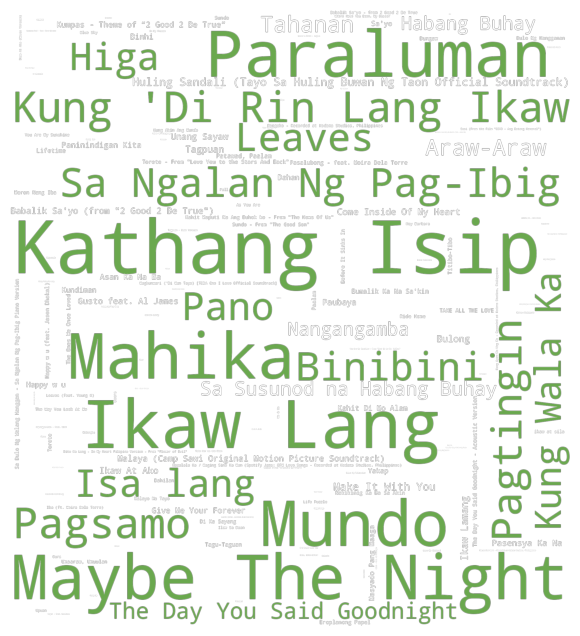

In [ ]:
# Prepare Data
word_cloud_artist = dict(zip(top_10_songs.index, top_10_songs.values))

# Define a custom color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Set the color and font for large fonts (e.g., streams >= threshold)
    threshold = 107403114  # Adjust this threshold as needed
    if word_cloud_artist.get(word, 0) >= threshold:
        return "#6aa84eff"
    else:
        return "white"

# Create a WordCloud object with the custom color function
wordcloud = WordCloud(
    width=2000,
    height=2200,
    background_color=None,  # Transparent background
    mode="RGBA",
    color_func=color_func,
).generate_from_frequencies(word_cloud_artist)

# Display Word Cloud
plt.figure(figsize=(9, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the Word Cloud with a transparent background
wordcloud.to_file("songs_cloud.png")

plt.show()

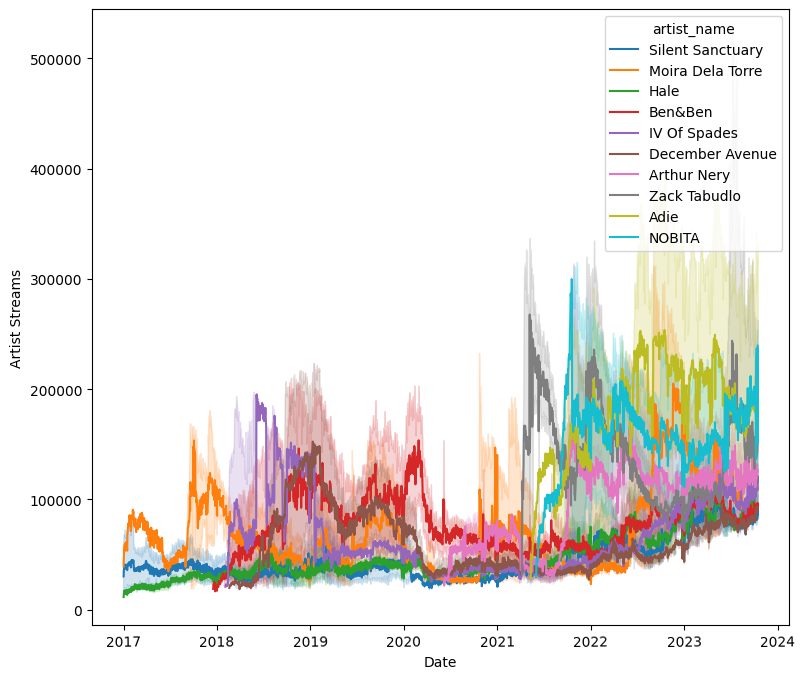

In [ ]:
# Stream performance of Top 10 Pinoy Artists (takes long)
plt.figure(figsize=(9, 8))
sns.lineplot(x="chart_date", y="streams", hue="artist_name", data=top_10_pinoy)
# plt.title("Track Streams Performance")
plt.xlabel("Date")
plt.ylabel("Artist Streams")
plt.xticks(rotation=1)
# plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))  # Adjust the legend position
plt.grid(False)

plt.savefig('pinoy10artist_streams.png', transparent=True)

plt.show()

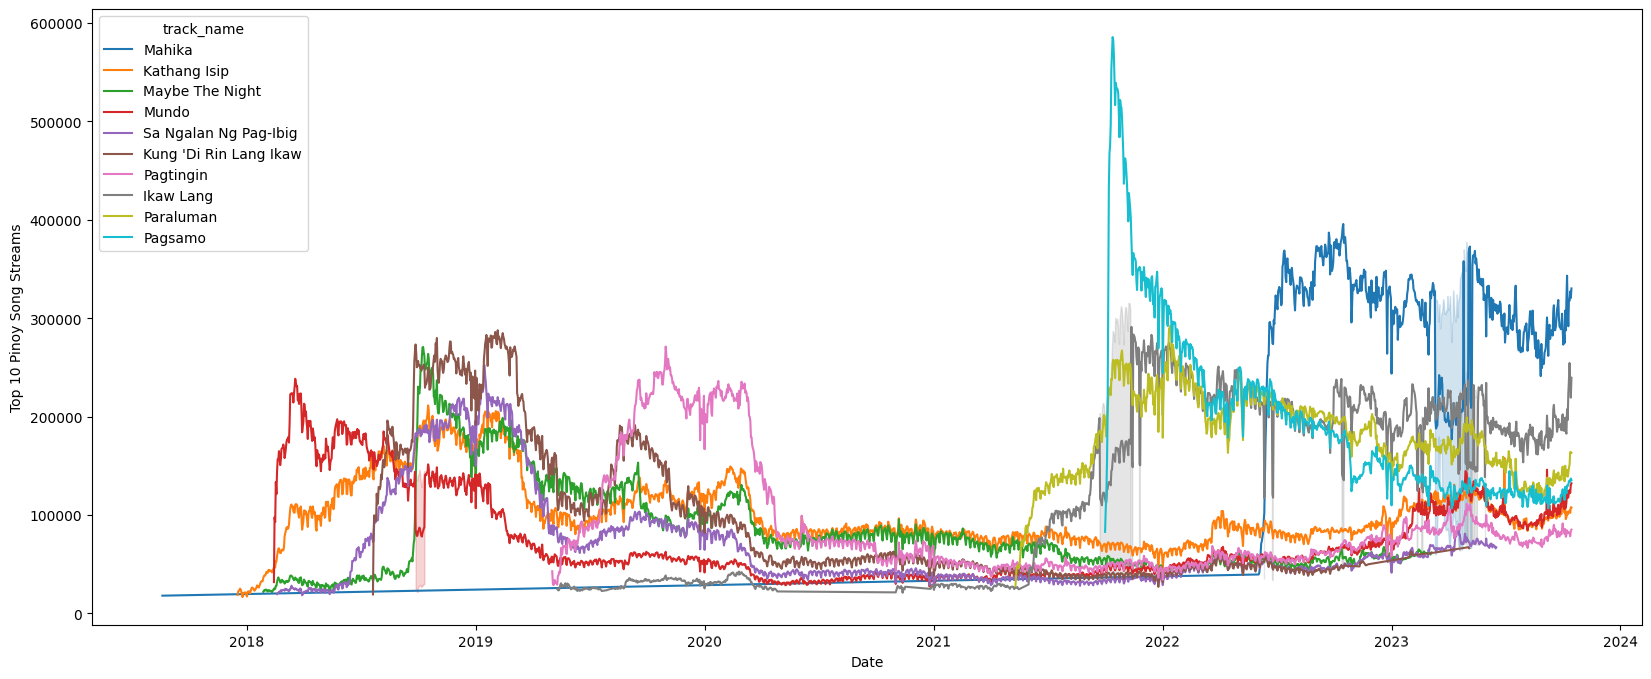

In [ ]:
# Performance of top 10 songs over time
top_10_songs_df = pinoy_genres[pinoy_genres['track_name'].isin(top_10_songs.index[:10])]
top_10_songs_df['track_name'].unique()

plt.figure(figsize=(20, 8))
sns.lineplot(x="chart_date", y="streams", hue="track_name", data=top_10_songs_df)
# plt.title("Track Streams Performance")
plt.xlabel("Date")
plt.ylabel("Top 10 Pinoy Song Streams")
plt.xticks(rotation=1)
# plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))  # Adjust the legend position
plt.grid(False)

plt.savefig('pinoy10songs_streams.png', transparent=True)

plt.show()

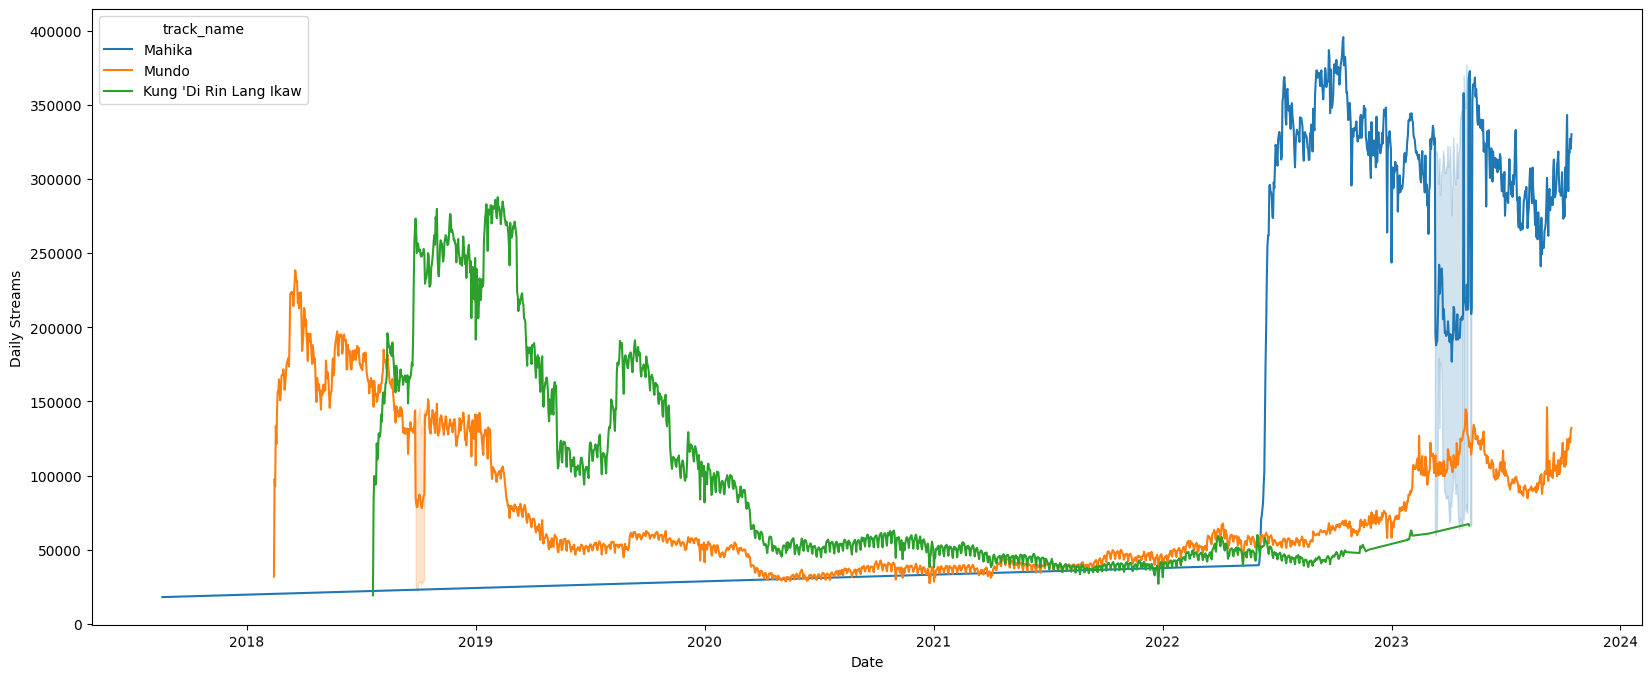

In [ ]:
# Subset for EDA Songs (to check events strategy)
eda_songs = ["Mundo","Mahika","Kung 'Di Rin Lang Ikaw"]
eda_songs_df = pinoy_genres[pinoy_genres['track_name'].isin(eda_songs)]

plt.figure(figsize=(20, 8))
sns.lineplot(x="chart_date", y="streams", hue="track_name", data=eda_songs_df, legend=True)
# plt.title("Track Streams Performance")
plt.xlabel("Date")
plt.ylabel("Daily Streams")
plt.xticks(rotation=1)
# plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))  # Adjust the legend position
plt.grid(False)

plt.savefig('eda_songs_streams.png', transparent=True)

plt.show()

In [ ]:
# Deep dive on Mundo
mundo_max = top_10_songs_df[top_10_songs_df['track_name']=="Mundo"]
mundo_max = mundo_max.sort_values("streams", ascending=False)
mundo_max.head(50)[['streams','chart_date','release_date']]

In [ ]:
# Deep dive on Kung 'Di Rin Lang Ikaw
pagsamo_max = top_10_songs_df[top_10_songs_df['track_name']=="Kung 'Di Rin Lang Ikaw"]
pagsamo_max = pagsamo_max.sort_values("streams", ascending=False)
pagsamo_max.head(10)[['streams','chart_date','release_date']]

In [ ]:
# Deep dive on Mahika
mahika_max = top_10_songs_df[top_10_songs_df['track_name']=="Mahika"]
mahika_max = mahika_max.sort_values("streams", ascending=False)
mahika_max.head(50)[['streams','chart_date','release_date']]

In [ ]:
# Get date that Mundo spiked
max_streams = top_10_songs_df['streams'].max()
mundo_max_streams_date = top_10_songs_df[(top_10_songs_df['streams'] == max_streams) & (top_10_songs_df['track_name'] == "Mundo")]['chart_date']


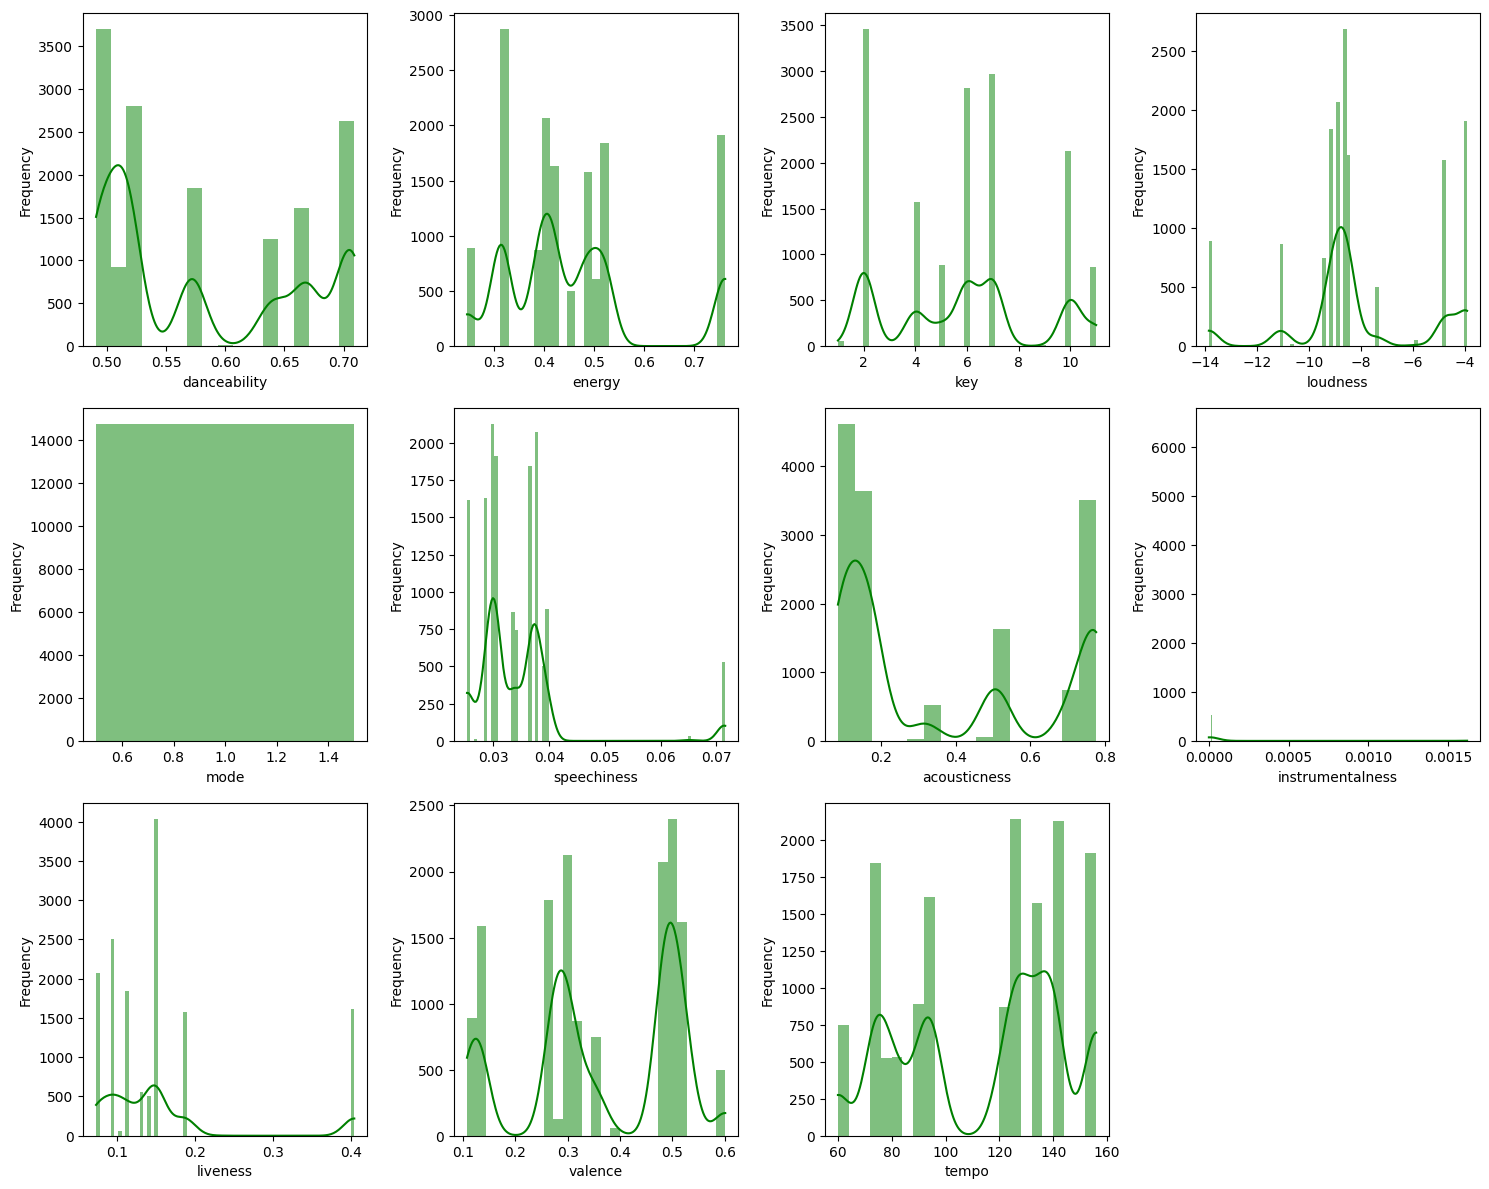

In [ ]:
# Audio features of top songs shown above
top_10_artists_songs_df = pinoy_genres[pinoy_genres['track_name'].isin(top_10_songs.index)]

# Define the columns you want to compare
compare_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
compare_songs = top_10_songs_df['track_name'].unique()

# Number of charts per row
charts_per_row = 4

# Calculate the number of rows needed
num_rows = (len(compare_columns) + charts_per_row - 1) // charts_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(compare_columns):
    row_index = i // charts_per_row
    col_index = i % charts_per_row
    data = top_10_songs_df
    sns.histplot(data[col], ax=axes[row_index, col_index], kde=True, edgecolor='None', color="green")

    # axes[row_index, col_index].set_title("Audio Features of Top 10 Pinoy Songs")
    axes[row_index, col_index].set_ylabel('Frequency')
    # axes[row_index, col_index].legend(frameon=False)

# Remove empty subplots
for i in range(len(compare_columns), num_rows * charts_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

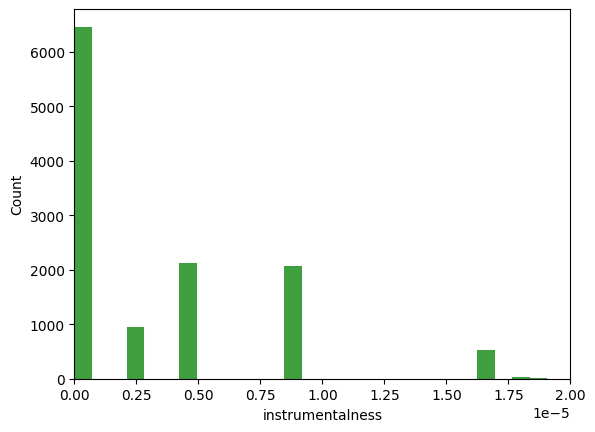

In [ ]:
# Zoom in on Deep dive on instrumentalness of top songs
x_min = 0
x_max = 0.00002

sns.histplot(data=top_10_songs_df,x="instrumentalness", color="green")
plt.xlim(x_min, x_max)

plt.show()

### **2.3.3 EDA on mrld**

#### EDA on mrld PH Daily Top 200 Songs
- Top songs of mrld follow same pattern for top songs of other top pinoy artists

In [ ]:
# Make mrld top songs dataframe
mrld_df = pinoy_genres[pinoy_genres['artist_name']=='mrld']
mrld_df

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
359107,2021-12-01,3sJKnpDvliJ9OH4cORjatB,Ligaya,38385,148,2021-10-06,0k85IwWv2bdmLKU9ZVgIEe,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.533,0.000000,0,0.114,-5.249,1,0,0.0381,149.832,0.343
359276,2021-12-02,3sJKnpDvliJ9OH4cORjatB,Ligaya,48517,117,2021-10-06,0k85IwWv2bdmLKU9ZVgIEe,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.533,0.000000,0,0.114,-5.249,1,0,0.0381,149.832,0.343
359482,2021-12-03,3sJKnpDvliJ9OH4cORjatB,Ligaya,45884,123,2021-10-06,0k85IwWv2bdmLKU9ZVgIEe,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.533,0.000000,0,0.114,-5.249,1,0,0.0381,149.832,0.343
359676,2021-12-04,3sJKnpDvliJ9OH4cORjatB,Ligaya,44625,117,2021-10-06,0k85IwWv2bdmLKU9ZVgIEe,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.533,0.000000,0,0.114,-5.249,1,0,0.0381,149.832,0.343
359870,2021-12-05,3sJKnpDvliJ9OH4cORjatB,Ligaya,44519,111,2021-10-06,0k85IwWv2bdmLKU9ZVgIEe,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.533,0.000000,0,0.114,-5.249,1,0,0.0381,149.832,0.343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495421,2023-10-14,4z7xboLD3PqY9dOUscS2ly,Ikaw Pa Rin,159259,57,2022-09-02,6yoXzcdZwga0Gqmmqkvz1k,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.374,0.000007,4,0.168,-11.538,1,72,0.0307,108.926,0.306
495485,2023-10-14,4IeuTj1pEHuL9vJSiEqEfR,Ligaya,105260,121,2021-10-06,0ccUyUkrIynFO5USku5IHH,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.533,0.000000,0,0.114,-5.249,1,72,0.0381,149.832,0.343
495554,2023-10-14,22Nd3GuO7sHopPjdKccRcq,An Art Gallery Could Never Be As Unique As You,83641,190,2019-12-11,0FRaoawfqep3bJcCqcQZpD,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.299,0.000000,7,0.133,-12.077,1,76,0.0525,121.750,0.196
495632,2023-10-15,4z7xboLD3PqY9dOUscS2ly,Ikaw Pa Rin,144096,68,2022-09-02,6yoXzcdZwga0Gqmmqkvz1k,31fsDbpNPKe346urriO4ma,mrld,['opm'],...,0.374,0.000007,4,0.168,-11.538,1,72,0.0307,108.926,0.306


Further investigate danceability, loudness, speechiness acousticness liveness, instrumentalness


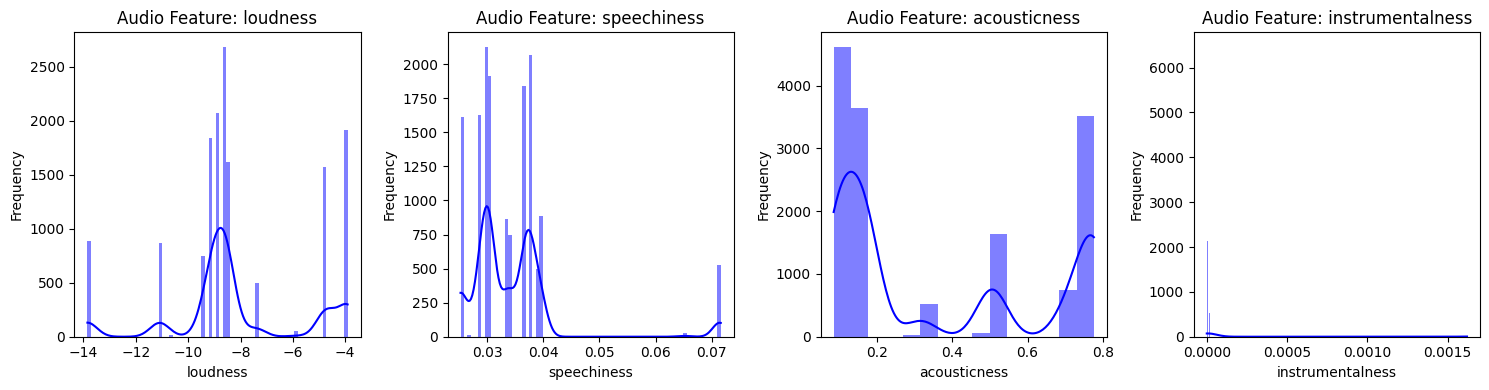

In [ ]:
# Audio features of mrld's TOP 200 songs
print('Further investigate danceability, loudness, speechiness', 'acousticness','liveness, instrumentalness')

# Define the columns you want to compare
mrld_columns = ['loudness', 'speechiness', 'acousticness', 'instrumentalness']
mrld_songs = mrld_df['track_name'].unique()

# Number of charts per row
charts_per_row = 4

# Calculate the number of rows needed
num_rows = (len(mrld_columns) + charts_per_row - 1) // charts_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(mrld_columns):
    row_index = i // charts_per_row
    col_index = i % charts_per_row
    data = top_10_songs_df
    sns.histplot(data[col], ax=axes[i], kde=True, edgecolor='None', color="blue")

    axes[i].set_title(f"Audio Feature: {col}")
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(mrld_columns), num_rows * charts_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


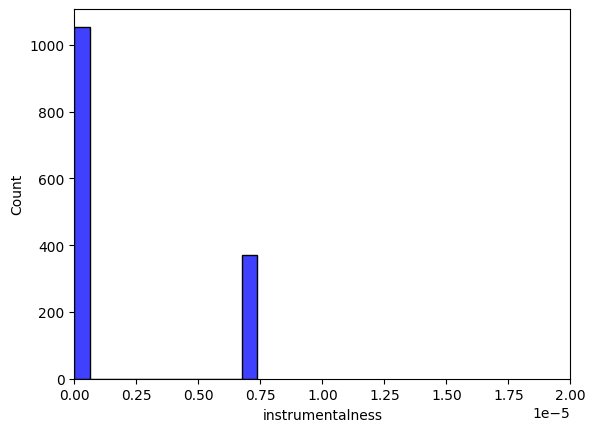

In [ ]:
# Deep dive on mrld's instrumentalness (top songs only)
x_min = 0
x_max = 0.00002

sns.histplot(data=mrld_df,x="instrumentalness", color="blue")
plt.xlim(x_min, x_max)

plt.show()

#### EDA on ALL mrld songs
- But overall pattern is different. There's room for improvement when it comes to audio track features

In [ ]:
all_mrld_songs.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_id,playlist_name
0,22Nd3GuO7sHopPjdKccRcq,An Art Gallery Could Never Be As Unique As You,31fsDbpNPKe346urriO4ma,mrld,0FRaoawfqep3bJcCqcQZpD,158677,2019-12-11,77,0.480,0.299,...,1,0.0525,0.838,0.000000,0.1330,0.196,121.750,158677,37i9dQZF1DZ06evO1KbXMc,This Is mrld
1,4z7xboLD3PqY9dOUscS2ly,Ikaw Pa Rin,31fsDbpNPKe346urriO4ma,mrld,6yoXzcdZwga0Gqmmqkvz1k,191009,2022-09-02,73,0.412,0.374,...,1,0.0307,0.692,0.000007,0.1680,0.306,108.926,191009,37i9dQZF1DZ06evO1KbXMc,This Is mrld
2,4IeuTj1pEHuL9vJSiEqEfR,Ligaya,31fsDbpNPKe346urriO4ma,mrld,0ccUyUkrIynFO5USku5IHH,248800,2021-10-06,72,0.458,0.533,...,1,0.0381,0.447,0.000000,0.1140,0.343,149.832,248800,37i9dQZF1DZ06evO1KbXMc,This Is mrld
3,3Ues7YM3y8JYnTeu2OYFVH,Just Because,31fsDbpNPKe346urriO4ma,mrld,4KE1Eeu0tO0f2czX9pfaRc,193246,2023-02-10,62,0.557,0.406,...,1,0.0463,0.708,0.000016,0.1520,0.346,77.035,193247,37i9dQZF1DZ06evO1KbXMc,This Is mrld
4,11s7b3qNczlmVO0LT3PPte,Maligayang Pagkunwari,31fsDbpNPKe346urriO4ma,mrld,0NqV5yJbP7ngiQPY91J9dj,274500,2022-04-01,58,0.548,0.425,...,1,0.0323,0.531,0.000000,0.0831,0.331,119.862,274500,37i9dQZF1DZ06evO1KbXMc,This Is mrld


Further investigate danceability, loudness, speechiness, acousticness, liveness, instrumentalness


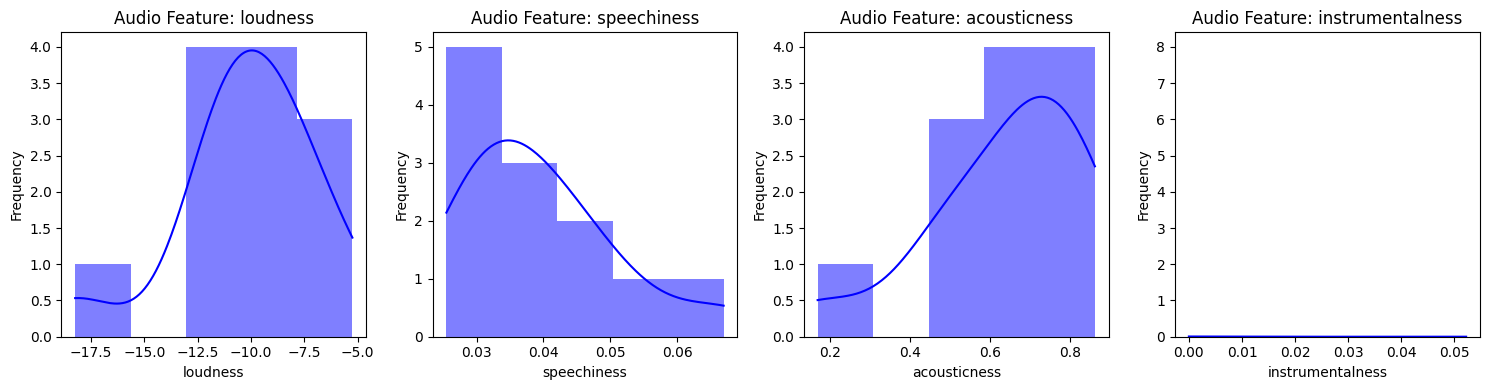

In [ ]:
# Audio features of top songs shown above
print('Further investigate danceability, loudness, speechiness, acousticness, liveness, instrumentalness')

# Define the columns you want to compare
mrld_columns = ['loudness', 'speechiness', 'acousticness', 'instrumentalness']
mrld_list = all_mrld_songs['track_name'].unique()

# Number of charts per row
charts_per_row = 4

# Calculate the number of rows needed
num_rows = (len(mrld_columns) + charts_per_row - 1) // charts_per_row

# Create subplots
fig = plt.figure(figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(mrld_columns):
    row_index = i // charts_per_row
    col_index = i % charts_per_row
    data = all_mrld_songs
    ax = fig.add_subplot(num_rows, charts_per_row, i + 1)  # Create a subplot
    sns.histplot(data[col], kde=True, edgecolor='None', color="blue", ax=ax)

    ax.set_title(f"Audio Feature: {col}")
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


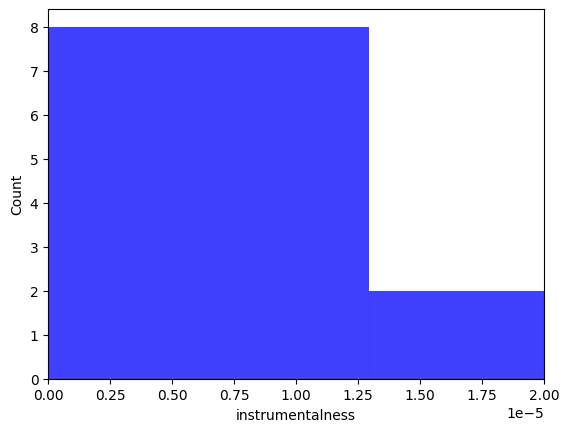

In [ ]:
# Deep dive on instrumentalness of all mrld songs
x_min = 0
x_max = 0.00002

sns.histplot(data=all_mrld_songs,x="instrumentalness", color="blue")
plt.xlim(x_min, x_max)

plt.show()

### **2.3.4 Time-Series Forecasting**

In [ ]:
import statsmodels.api as sm
from statsmodels import datasets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
charts_df = df_charts.copy(deep=True)
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df = charts_df.set_index('date')
charts_df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [ ]:
# dataframe for the top Filipino artists and mrld
big_10 = ['Ben&Ben', 'Zack Tabudlo', 'Moira Dela Torre', 'December Avenue', 'Arthur Nery', 'Adie', 'NOBITA', 'Silent Sanctuary', 'IV Of Spades', 'Hale']
b10_df = charts_df[charts_df['artist'].isin(big_10)]
b10_df_agg = b10_df.reset_index(names='date').groupby('date').agg({'streams': 'sum'})
b10_df_agg_w = b10_df_agg['streams']['2021-12-01':].resample('W').sum()
mrld_df = charts_df[charts_df['artist'] == 'mrld']
mrld_df_w = mrld_df['streams'].resample('W').sum()

In [ ]:
# mrld's had the most streams from January 2023 - May 2023
mrld_df.resample('MS').agg({'streams': 'sum'}).sort_values(by='streams', ascending=False).head(5)

,streams
date,
2023-03-01,10786874
2023-04-01,9546582
2023-05-01,9255016
2023-02-01,8927693
2023-01-01,8701875


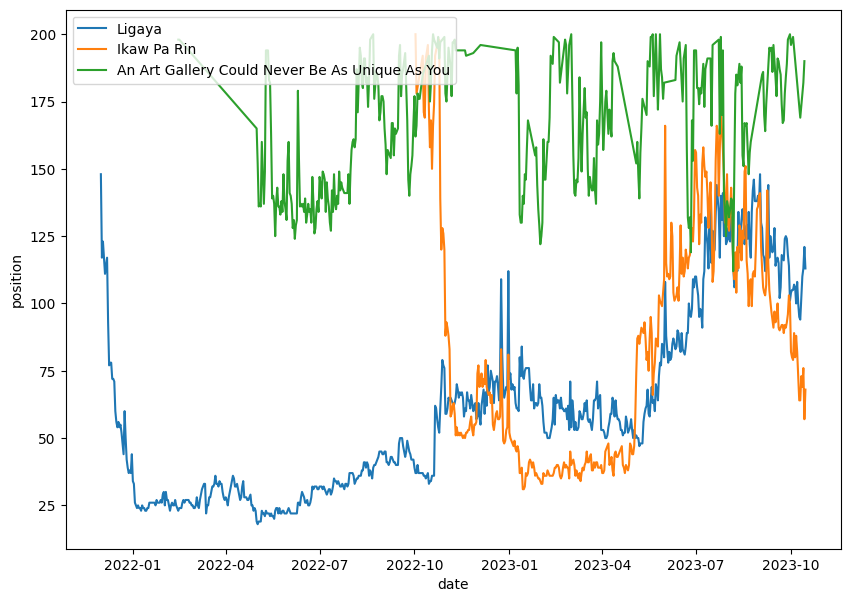

In [ ]:
# track position over time. Ligaya has been her most successful song in terms of peak position, peaked at 18 on May 2022.
plt.figure(figsize=(10, 7))
sns.lineplot(data=mrld_df.sort_values(by='position', ascending=True).reset_index(names='date'), x='date', y='position', hue='track_name')
plt.legend(loc='upper left')
plt.show()

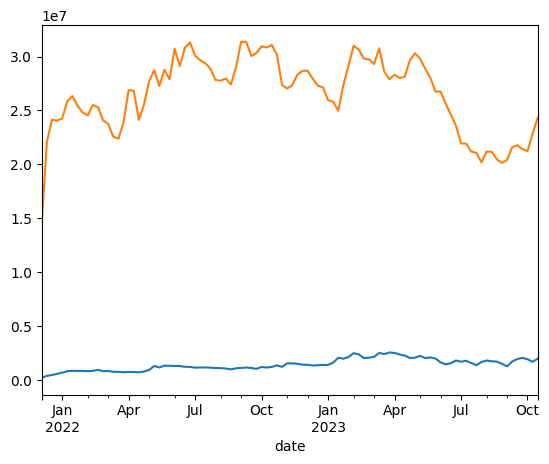

In [ ]:
# weekly streaming plot for mrld and the top Filipino artists
mrld_df_w.plot()
b10_df_agg_w.plot()
plt.show()

In [ ]:
mrld_df_w.reset_index('date')

,date,streams
0,2021-12-05,221930
1,2021-12-12,391970
2,2021-12-19,473443
3,2021-12-26,575733
4,2022-01-02,689594
...,...,...
93,2023-09-17,1955155
94,2023-09-24,2061018
95,2023-10-01,1939563
96,2023-10-08,1699923


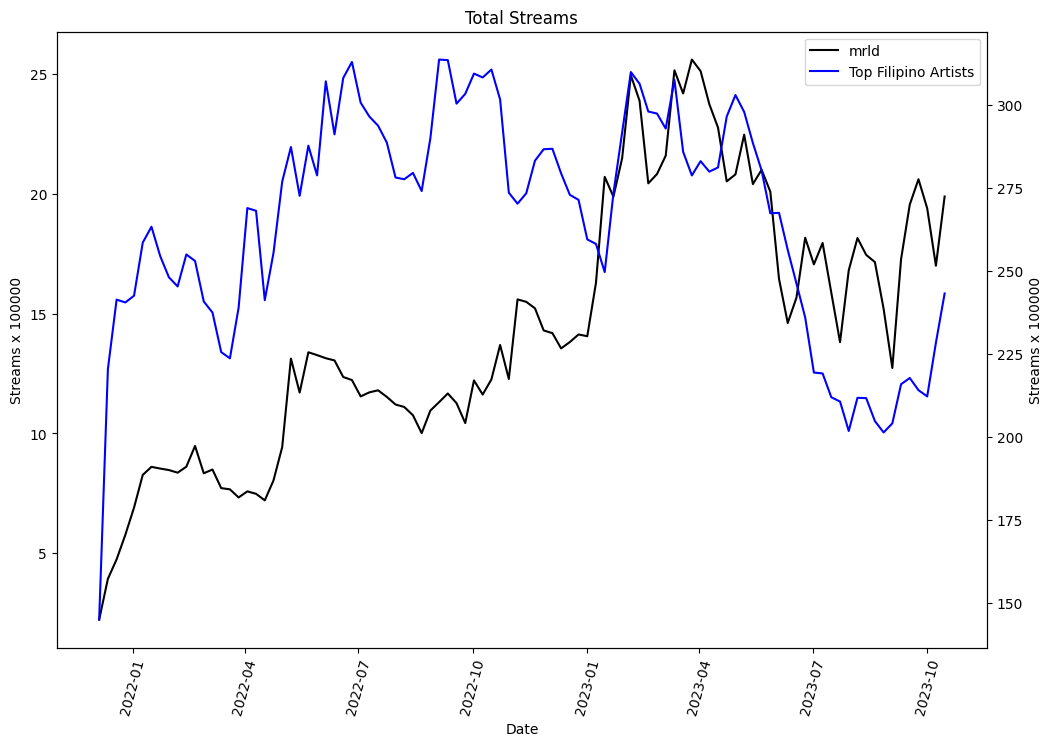

In [ ]:
# Same plot as above but scaled to better see how the number of streams are trending
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.plot(mrld_df_w.reset_index('date')['date'], (mrld_df_w.reset_index('date')['streams'])/100000, color='black', label='mrld')
ax1.patch.set_alpha(0)
ax1.set_xlabel('Date', color='black')
ax1.set_ylabel('Streams x 100000', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelcolor='black', rotation=75)

ax2 = ax1.twinx()

ax2.plot(b10_df_agg_w.reset_index('date')['date'], (b10_df_agg_w.reset_index('date')['streams'])/100000, color='blue', label='Top Filipino Artists')
ax2.set_ylabel('Streams x 100000', color='black')
ax2.tick_params(axis='y', labelcolor='black')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='best')

plt.title('Total Streams', color='black')
plt.show()



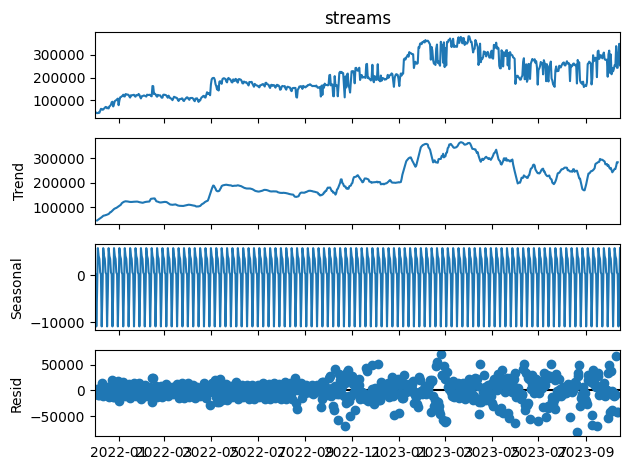

In [ ]:
# use the function from the lecture to plot TS data to check for trends and seasonality
def plot_ts_data(data, lower_bound, upper_bound, mark_outliers=True):
    fig = plt.subplots(figsize=(13,4))
    plt.plot(data)
    plt.fill_between(data.index, lower_bound, upper_bound, color='k',alpha=0.15)

    if mark_outliers:
        data_above_ub = data[data['streams']>upper_bound]
        data_below_lb = data[data['streams']<lower_bound]
        plt.plot(data_above_ub, color='C1', marker='o', ms=3, lw=0)
        plt.plot(data_below_lb, color='C2', marker='o', ms=3, lw=0)

    plt.legend()
    plt.ylabel('streams')


res = sm.tsa.seasonal_decompose(mrld_df.reset_index('date').groupby('date').agg({'streams': 'sum'})['streams'])
resplot = res.plot()

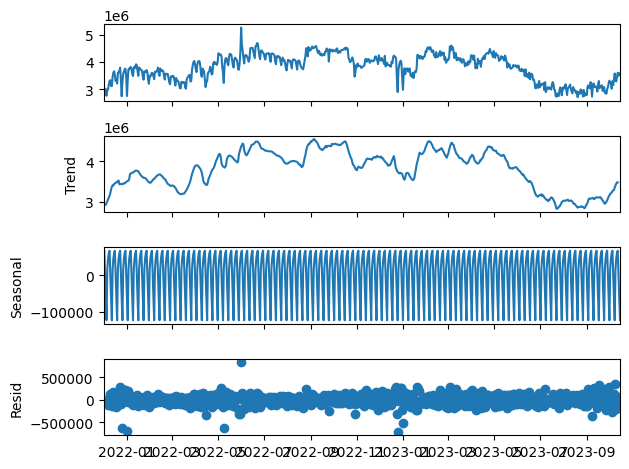

In [ ]:
res_10 = sm.tsa.seasonal_decompose(b10_df['2021-12-01': ].reset_index('date').groupby('date').agg({'streams': 'sum'}))
resplot10 = res_10.plot()

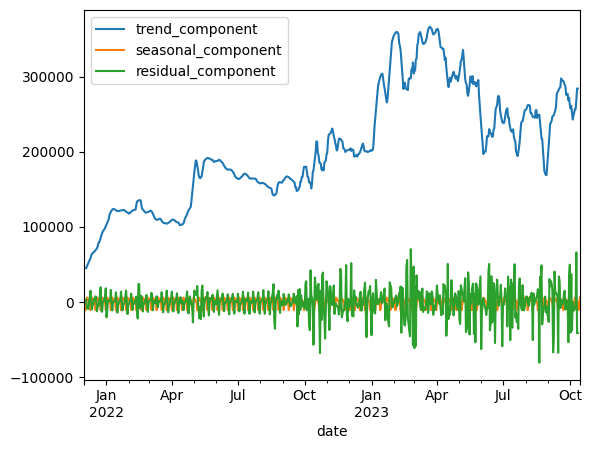

In [ ]:
# decompose to see in more detail if there are any seasonal trends, looking at the plots above, it doesn't look like there's any seasonality

#mrld
decomposed = mrld_df.reset_index('date').groupby('date').agg({'streams': 'sum'})
decomposed['trend_component'] = res.trend
decomposed['seasonal_component'] = res.seasonal
decomposed['residual_component'] = res.resid
decomposed[['trend_component','seasonal_component','residual_component']].plot()
plt.show()

# trend line shows that mrld is still trending upwards in streaming numbers

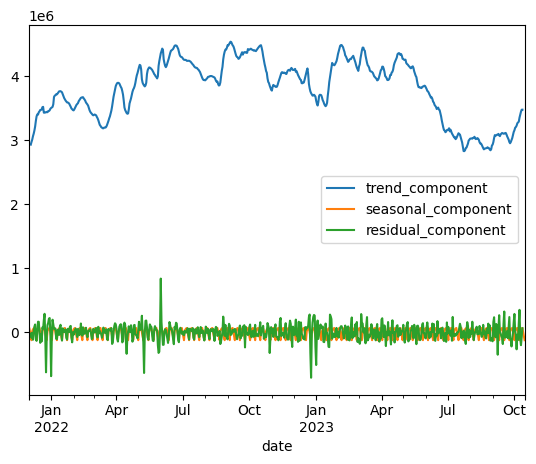

In [ ]:
# top filipino artists
decomposed10 = b10_df['2021-12-01': ].reset_index('date').groupby('date').agg({'streams': 'sum'})
decomposed10['trend_component'] = res_10.trend
decomposed10['seasonal_component'] = res_10.seasonal
decomposed10['residual_component'] = res_10.resid
decomposed10[['trend_component','seasonal_component','residual_component']].plot()
plt.show()

# trend line shows that the collective streams of the top Filipino artsists experienced a down trend over the past few months but has now started to pick back up

In [ ]:
# function from the lecture to check if the data is stationary, is a prerequisite to using the plot_acf functions
def adf_test(data):
    adf_test = adfuller(data)
    adf_result = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','N Lags Used',\
                                                'N Observations Used'])
    for key,value in adf_test[4].items():
            adf_result['Critical Value (%s)'%key] = value

    return adf_result

mrld_data = mrld_df.reset_index('date').groupby('date').agg({'streams': 'sum'})
adf_test(mrld_data['streams'].diff()[1:])
# confirms that the data for mrld is stationary, p-value of less than 5, test statistic more negative than any of the critical values.

Test Statistic         -7.904868e+00
p-value                 4.092151e-12
N Lags Used             1.900000e+01
N Observations Used     6.630000e+02
Critical Value (1%)    -3.440252e+00
Critical Value (5%)    -2.865909e+00
Critical Value (10%)   -2.569097e+00
dtype: float64

In [ ]:
adf_test(b10_df['2021-12-01': ].reset_index('date').groupby('date').agg({'streams': 'sum'}).diff()[1:])

# confirms that the data for the top Filipino artists is stationary, p-value of less than 5, test statistic more negative than any of the critical values.

Test Statistic         -6.245615e+00
p-value                 4.583821e-08
N Lags Used             2.000000e+01
N Observations Used     6.620000e+02
Critical Value (1%)    -3.440267e+00
Critical Value (5%)    -2.865916e+00
Critical Value (10%)   -2.569100e+00
dtype: float64

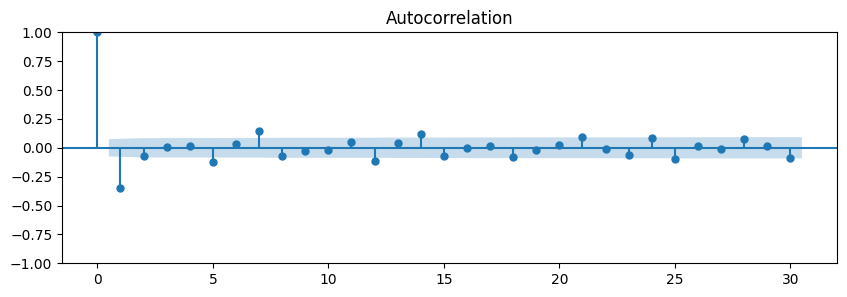

In [ ]:
fig,ax = plt.subplots(figsize=(10,3))
acf = plot_acf(mrld_data['streams'].diff()[1:], lags=30, ax=ax)

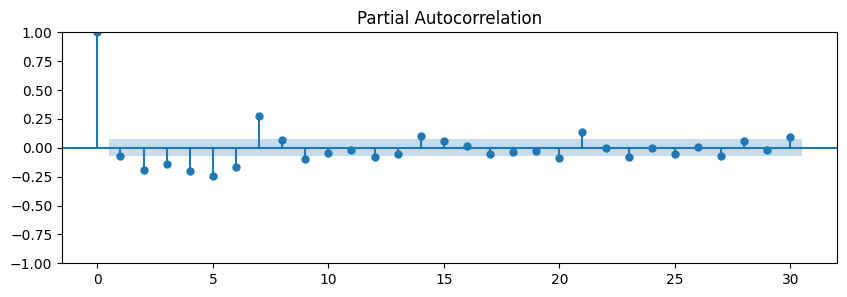

In [ ]:
fig,ax = plt.subplots(figsize=(10,3))
acf = plot_pacf(b10_df['2021-12-01': ].reset_index('date').groupby('date').agg({'streams': 'sum'}).diff()[1:], lags=30, ax=ax)

# both datasets show that there is a statistically significant partial autocorrelation on lag 7,
# showing that there may be weekly cylces. Checking for monthly or yearly didn't really result in anything significant. The lag of 7 could also be used for ARIMA
# 7 will also be used as the number of seasonal periods for training the exponential smoothing forecasting model

In [ ]:
b10_copy = b10_df.copy(deep=True)
b10_copy.reset_index(names='date', inplace=True)
b10_copy['day'] = b10_copy['date'].dt.day_name()
b10_copy.groupby('day').agg({'streams': 'mean'}).sort_values(by='streams', ascending=False)

# checking the total streams for the days, there isn't really a day that gets significantly more strams than other days but interestingly, days in the middle of the week had the most total streams for the top Filipino artists

,streams
day,
Thursday,83250.689863
Wednesday,83026.024297
Tuesday,82751.440985
Friday,82462.037877
Monday,81946.889018
Saturday,79941.030345
Sunday,77692.288720


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# functions from the lectures to check error metrics for forecasting models

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def show_errors(y_true, y_pred):
    return pd.DataFrame({'RMSE': root_mean_squared_error(y_true,y_pred),\
                                            'MAE':mean_absolute_error(y_true,y_pred),\
                                            'MAPE': mean_absolute_percentage_error(y_true,y_pred)}, index=[0])

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
# define the train and test data
forecast_data = mrld_data
forecast_data_train = (forecast_data['2023-07-01':'2023-10-01']['streams'])/100000
forecast_data_test = (forecast_data['2023-10-01': ]['streams'])/100000

In [ ]:
# Exponential smoothing model
model_fit = ExponentialSmoothing(forecast_data_train ,seasonal_periods=7 ,trend='add', seasonal='add').fit()
forecast_df = pd.DataFrame(model_fit.forecast(len(forecast_data_test)).values, index=forecast_data_test.index, columns=['streams'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


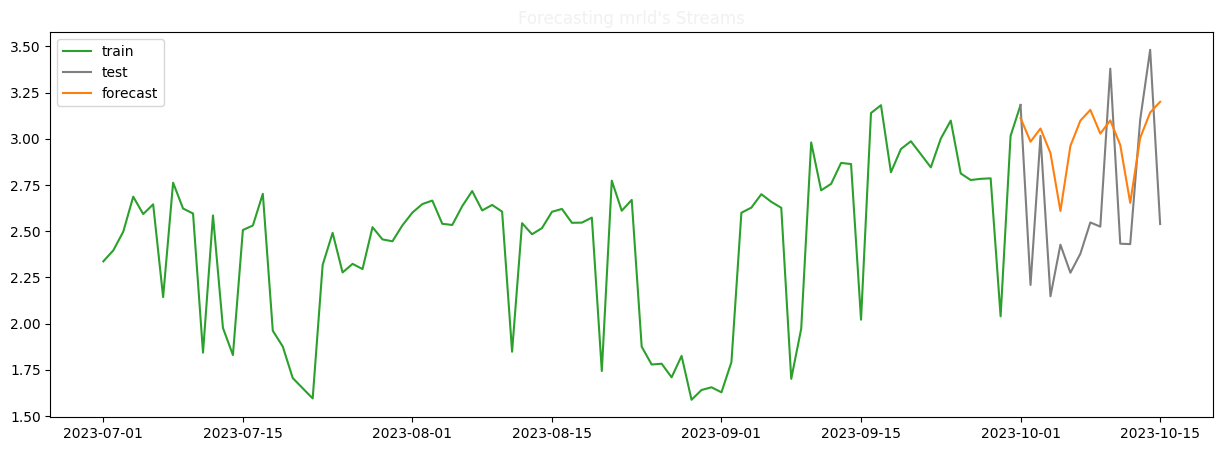

In [ ]:
fig = plt.figure(figsize=(15,5))
forecast_df_plot = model_fit.forecast(steps=40)
plt.plot(forecast_data_train, color='C2', label='train')
plt.plot(forecast_data_test, color='C7', label='test')
plt.plot(forecast_df, color='C1', label='forecast')
# plt.plot(forecast_df_plot.iloc[13:], color='#6aa84e', label='forecast')
plt.legend()
plt.title('Forecasting mrld\'s Streams', color='#f2f0f0')
plt.show()

In [ ]:
show_errors(forecast_data_test, forecast_df['streams'])

,RMSE,MAE,MAPE
0,0.505389,0.433237,17.663324


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
forecast_data = mrld_data
forecast_data_train = (forecast_data['2023-07-01':'2023-10-01']['streams'])/100000
forecast_data_test = (forecast_data['2023-10-01': ]['streams'])/100000

In [ ]:
# ARIMA
model = ARIMA(forecast_data_train, order=(7, 1, 7))
model_fit = model.fit()
train_fit_df = pd.DataFrame(model_fit.fittedvalues, columns=['streams'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


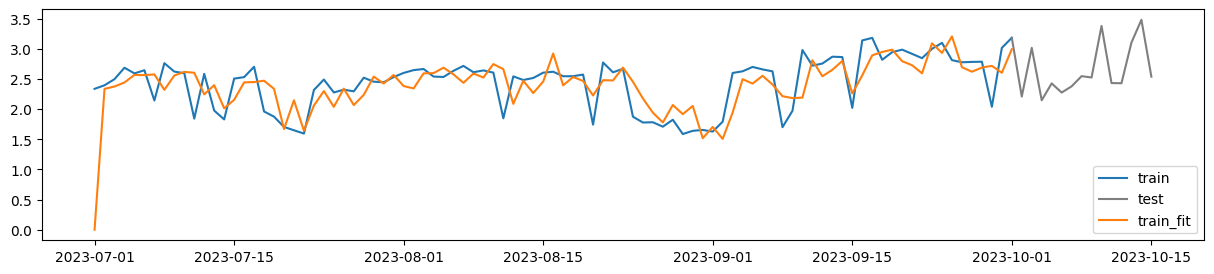

In [ ]:
fig = plt.figure(figsize=(15,3))

plt.plot(forecast_data_train, color='C0', label='train')
plt.plot(forecast_data_test, color='C7', label='test')
plt.plot(train_fit_df['streams'], color='C1', label='train_fit')
plt.legend()

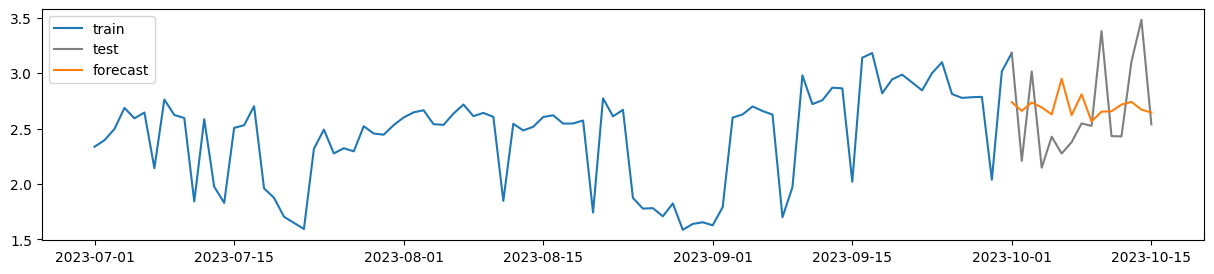

In [ ]:
forecast_df = pd.DataFrame(model_fit.forecast(len(forecast_data_test),dynamic=True).values, index=forecast_data_test.index,\
                           columns=['streams'])

fig = plt.figure(figsize=(15,3))

plt.plot(forecast_data_train, color='C0', label='train')
plt.plot(forecast_data_test, color='C7', label='test')
plt.plot(forecast_df['streams'], color='C1', label='forecast')

plt.legend()

In [ ]:
show_errors(forecast_data_test, forecast_df['streams'])

,RMSE,MAE,MAPE
0,0.436606,0.377203,14.0491
